# Time series forcasting with tensorflow 💰📈

⚠️ This is not financial advice!

## Check for GPU

In [1]:
# Check for GPU
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-5ff9539b-470c-d558-4159-229903cababf)


# Get data

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-08-03 09:15:06--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.003s  

2023-08-03 09:15:07 (59.6 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
                 parse_dates=["Date"],
                 index_col="Date") # Parse the date column and tell pandas column 1 is a datetime.
df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [5]:
df.tail()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430


## Basic info of a  time series data

* #### Trend: Longterm increase/decrease.
* #### Seasonal: Time series affected by seasonal factors like such as time of year (increase sales towards end of year).
* #### Cyclic: Time series shows rises and falls over an unfixed period, these tends to be more variable and longer than seasonal.

> 🔑 **Note** : **Seasonality** of a time series dataset is number of samples per year, so for bitcoin data, it has a seasonality of 365 (that means if we have daily data, there are 365 samples per year).

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [7]:
bitcoin = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})

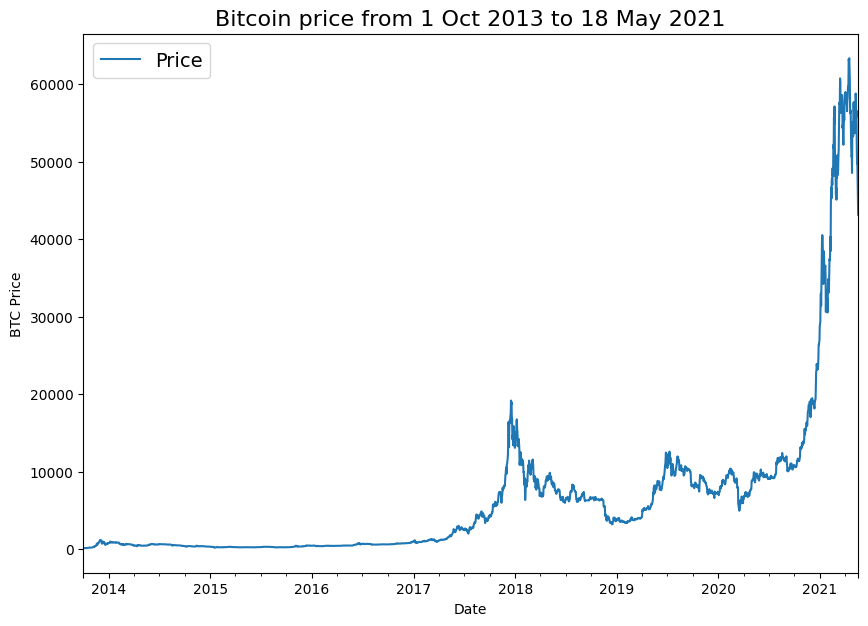

In [8]:
bitcoin.plot(figsize=(10, 7))
plt.title("Bitcoin price from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend(fontsize=14, loc='upper left'); # Change the font size of legend

# Importing data using `csv` module (Optional)

In [9]:
from datetime import datetime
import csv

timesteps = []
btc_price = []

with open('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', 'r') as f:
  csv_reader = csv.reader(f)
  next(csv_reader) # Skip the first line (this gets rid of the column)
  for lines in csv_reader:
    timesteps.append(datetime.fromisoformat(lines[1]))
    btc_price.append(float(lines[2]))

In [10]:
timesteps[:5], btc_price[:5]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0)],
 [123.65499, 125.455, 108.58483, 118.67466, 121.33866])

In [11]:
timesteps[-5:], btc_price[-5:]

([datetime.datetime(2021, 5, 14, 0, 0),
  datetime.datetime(2021, 5, 15, 0, 0),
  datetime.datetime(2021, 5, 16, 0, 0),
  datetime.datetime(2021, 5, 17, 0, 0),
  datetime.datetime(2021, 5, 18, 0, 0)],
 [49764.1320815975,
  50032.6931367648,
  47885.6252547166,
  45604.6157536131,
  43144.4712908603])

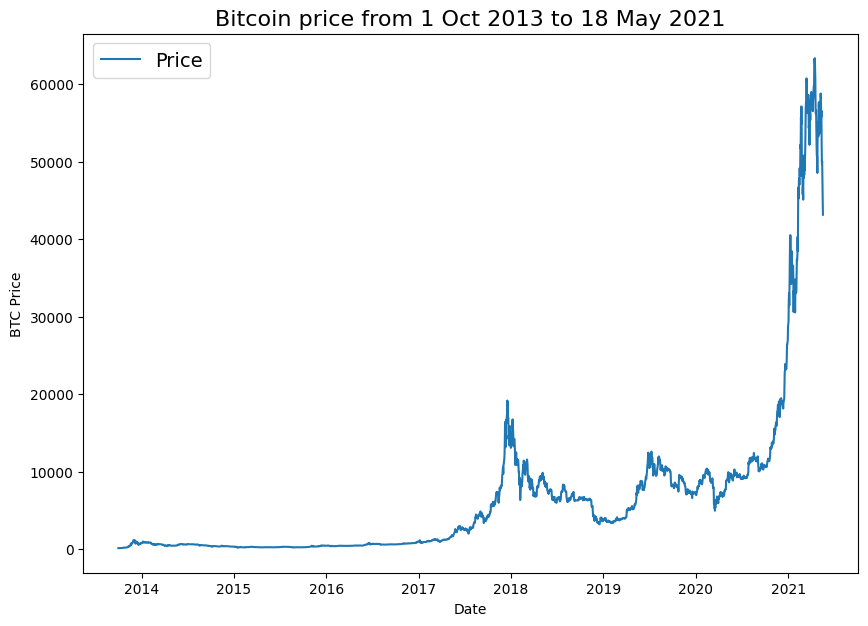

In [12]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Bitcoin price from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.ylabel("BTC Price")
plt.xlabel("Date")
plt.legend(['Price'], fontsize=14); # Adding name for the legend

# Creating training and test sets

Do not use `train_test_split` beacause the `test_data` should not contain old data and the `train_data` should not contain data from the future.

In [13]:
timestamps = bitcoin.index.to_numpy()
prices = bitcoin["Price"].to_numpy()
timestamps[:10], prices[:10]

(array(['2013-10-01T00:00:00.000000000', '2013-10-02T00:00:00.000000000',
        '2013-10-03T00:00:00.000000000', '2013-10-04T00:00:00.000000000',
        '2013-10-05T00:00:00.000000000', '2013-10-06T00:00:00.000000000',
        '2013-10-07T00:00:00.000000000', '2013-10-08T00:00:00.000000000',
        '2013-10-09T00:00:00.000000000', '2013-10-10T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [14]:
split_size =int(0.8 * len(df))

X_train, y_train = timestamps[:split_size], prices[:split_size]
X_test, y_test = timestamps[split_size:], prices[split_size:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

In [15]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label) # In plt.plot we have to set format directly after X and y
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

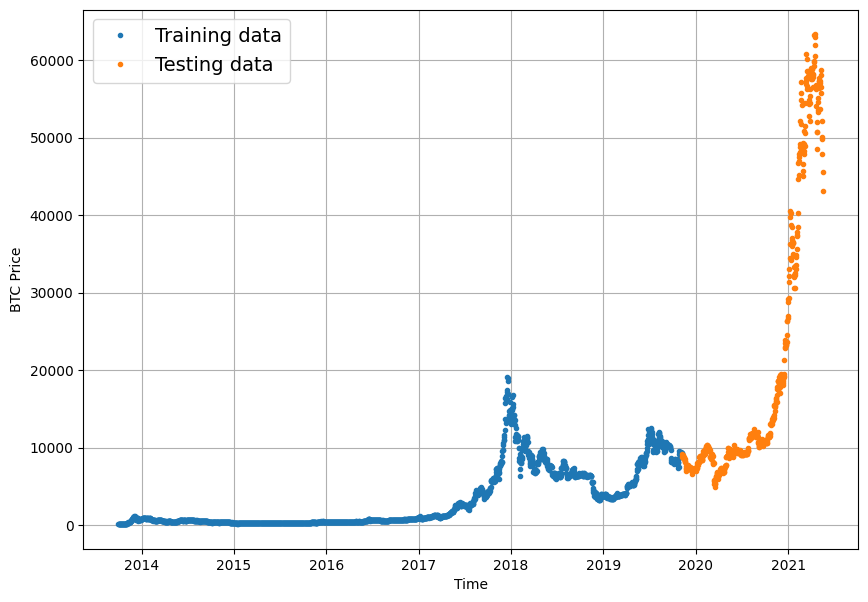

In [16]:
plt.figure(figsize=(10, 7))
plot_time_series(X_train, y_train, label='Training data')
plot_time_series(X_test, y_test, label='Testing data');

# Modelling Experiment
Make sure input and output are formatted correctly.
We need to generate these by using **window** and **horizon**.

* **horizon** = number of timesteps to predict into future.
* **window** = number of timesteps used in past to predict **horizon**.


# Model 0 (Naïve forecast)
It predicts the previous timestep as the next timestep.

The formula looks like this: $$\hat{y}_{t} = y_{t-1}$$

In English:
> The prediction at timestep `t` (y-hat) is equal to value at timestep `t-1` (the previous timestep).

In [17]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

In [18]:
y_test[:10], y_test[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([58788.20967893, 58102.19142623, 55715.54665129, 56573.5554719 ,
        52147.82118698, 49764.1320816 , 50032.69313676, 47885.62525472,
        45604.61575361, 43144.47129086]))

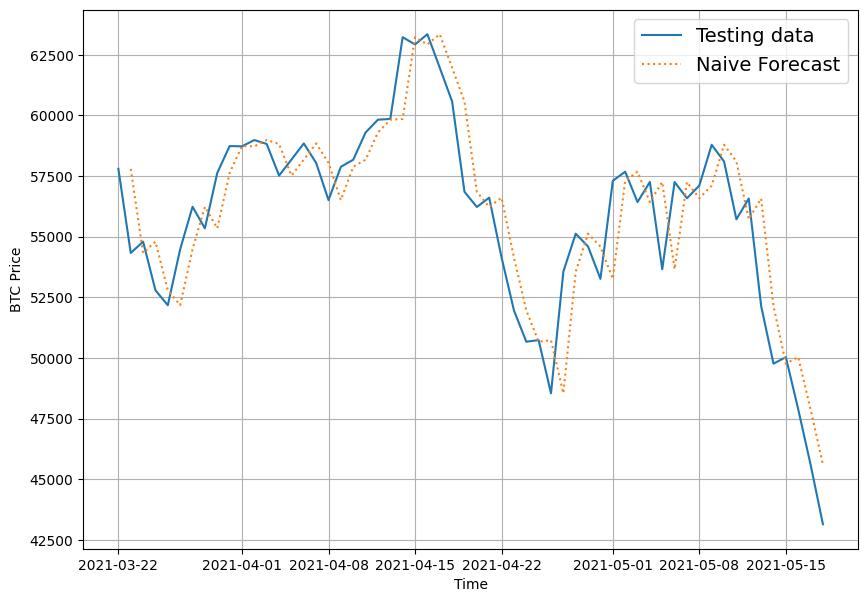

In [19]:
# Plot naive forecast
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(X_test, y_test, format='-', label='Testing data', start=offset)
plot_time_series(X_test[1:], naive_forecast, format=':', label='Naive Forecast', start=offset);

# Evaluating a time series model

Time series forecasting oftens involves predicting a number (in our case price of bitcoin).

So, we will use regression evaluation metrics, for time series these metrics are important:

* MAE: mean absolute error
* MSE: mean squared error
* RMSE: root mean squared error
* MAPE/sMAPE: (symmetric) mean absolute percentage error
* MASE: mean absolute scaled error (`mae/naive_mae`)

Lower these values, the better.

## Difference between MAPE and sMAPE

MAPE = 1/n * (Σ|( Actual — Predicted)|/Actual)

sMAPE = 1/n * (Σ|( Actual — Predicted)|/(Actual + Predicted/2))

For more info:

https://medium.com/illumination/mape-vs-smape-when-to-choose-what-be51a170df16#:~:text=In%20such%20cases%2C%20we%20can,we%20deviating%20from%20actual%20percentages.  

In [20]:
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [21]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)

  # For cases where horizon > 1
  if mae.ndim > 0:
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)
    mase = tf.reduce_mean(mase)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}


## Naive Results

In [22]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 567.9802,
 'mse': 1147547.0,
 'rmse': 1071.2362,
 'mape': 2.516525,
 'mase': 0.99957}

## Other kinds of time series forecasting models which can be used for baselines and actual forecasts

Since we've got a naïve forecast baseline to work with, it's time we start building models to try and beat it.

We will be going to use tensorflow deep learning models.

That being said, there are many other kinds of models we can use for building baselines/performing forecasts.

Some of them may even beat the best performing models in this notebook:

| **Model/Library Name** | **Resource** |
| ----- | ----- |
| Moving average | https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/ |
| ARIMA (Autoregression Integrated Moving Average) | https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/ |
| sktime (Scikit-Learn for time series) | https://github.com/alan-turing-institute/sktime |
| TensorFlow Decision Forests (random forest, gradient boosting trees) | https://www.tensorflow.org/decision_forests |
| Facebook Kats (purpose-built forecasting and time series analysis library by Facebook) | https://github.com/facebookresearch/Kats |
| LinkedIn Greykite (flexible, intuitive and fast forecasts) | https://github.com/linkedin/greykite |

## Convert Time Series Problems into Supervised

There are two approaches for the conversion
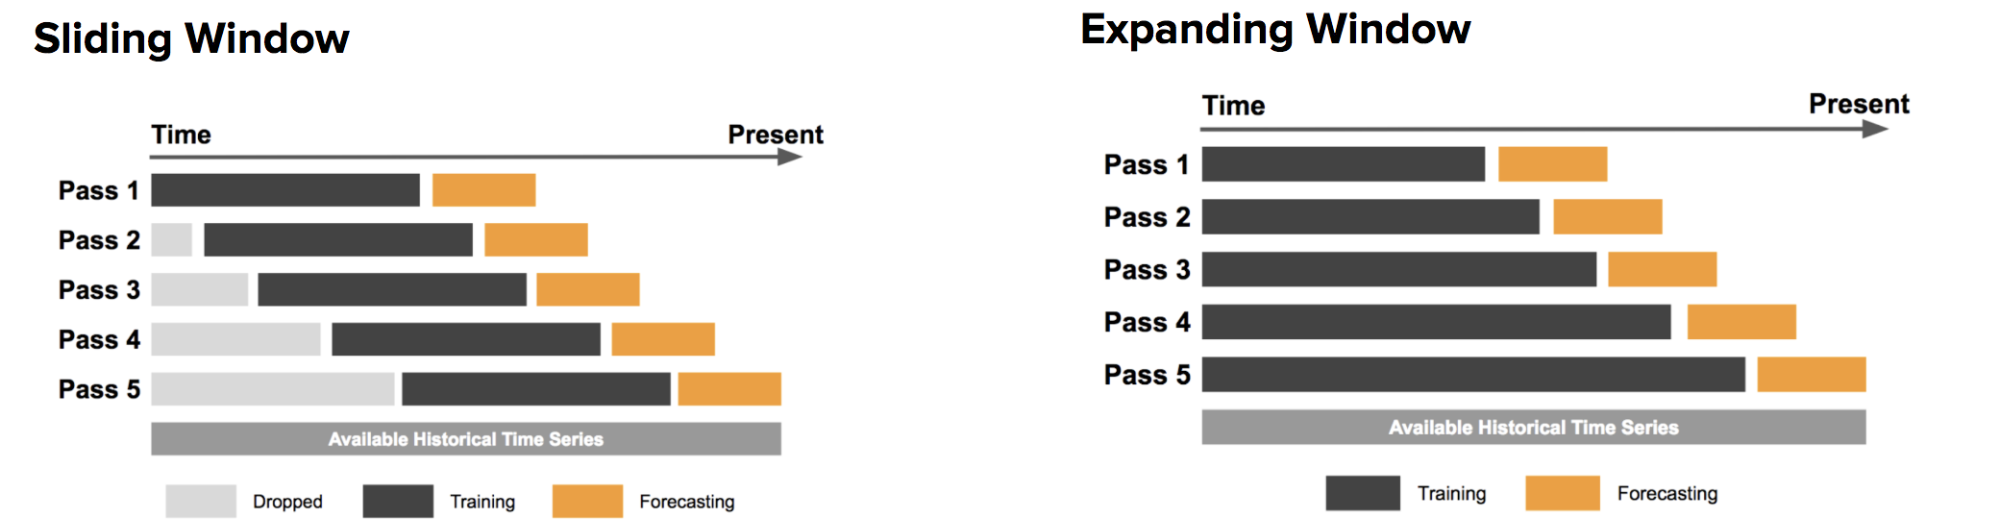

We will be focusing on sliding window.

 Important links:

 https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/

 https://www.uber.com/en-IN/blog/forecasting-introduction/#:~:text=Model%2Dbased%20forecasting%20is%20the,of%20models%20following%20different%20theories.

In [23]:
HORIZON = 1 # Predict the next one day
WINDOW_SIZE = 7 # Use past week of bitcoin data to make the prediction.

In [24]:
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [[1, 2, 3, 4, 5, 6]] -> Output: [[1, 2, 3, 4, 5], [6]]
  """
  return x[:, :-horizon], x[:,-horizon:]

In [25]:
# Test out the window labelling function
window, label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(window).numpy()} -> Label: {tf.squeeze(label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


Now we need a way to make windows for an entire time series.

We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage [NumPy's array indexing](https://numpy.org/doc/stable/reference/arrays.indexing.html).

Let's write a function which:
1. Creates a window step of specific window size, for example: `[[0, 1, 2, 3, 4, 5, 6, 7]]`
2. Uses NumPy indexing to create a 2D of multiple window steps, for example:
```
[[0, 1, 2, 3, 4, 5, 6, 7],
 [1, 2, 3, 4, 5, 6, 7, 8],
 [2, 3, 4, 5, 6, 7, 8, 9]]
```
3. Uses the 2D array of multuple window steps to index on a target series
4. Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon

> 📖 **Resource:** The function created below has been adapted from Syafiq Kamarul Azman's article [*Fast and Robust Sliding Window Vectorization with NumPy*](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5).

In [26]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size
  """

  # 1. Create a window of specific window_size (add the horizon in the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Create a 2D array of multiple window steps (minus 1 to account for zero indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size + horizon-1)), axis=0).T

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=HORIZON)

  return windows, labels

In [27]:
full_windows, full_labels = make_windows(prices)

In [28]:
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [29]:
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


Alternatve way of creating windows and horizons using:
https://www.tensorflow.org/api_docs/python/tf/keras/utils/timeseries_dataset_from_array

In [30]:
dataset = tf.keras.utils.timeseries_dataset_from_array(prices, prices[7:], sequence_length=7, shuffle=False, batch_size=1)
for i, batch in enumerate(dataset):
  if i == 3:
    break
  inputs, targets = batch
  print(f"Window: {inputs[0].numpy()} -> Label: {targets[0].numpy()}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: 123.033
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: 124.049
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: 125.96116


## Spliting the data into to train and test sets

In [31]:
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size= int(len(windows) * (1-test_split))
  train_windows, train_labels = windows[:split_size], labels[:split_size]
  test_windows, test_labels = windows[split_size:], labels[split_size:]

  return train_windows, test_windows, train_labels, test_labels

In [32]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
train_windows.shape, test_windows.shape, train_labels.shape, test_labels.shape

((2224, 7), (556, 7), (2224, 1), (556, 1))

In [33]:
np.array_equal(tf.squeeze(train_labels)[:-2], y_train[7:])

True

In [34]:
# Check to see if train labels are same (before and after window split)
np.array_equal(tf.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])

True

In [35]:
# Create a function to implement a ModelCheckpoint callback
import os

def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name),
                                            monitor='val_loss',
                                            verbose=0,
                                            save_best_only=True)

# Model 1: Dense (window = 7, horizon=1)

We are going to start with a simple model:

* A single dense layer with 128 hidden layers and ReLU activation.
* An output layer with linear activation function.
* Adam optimizer and MAE loss function.
* Batch size of 128.
* Train for 100 epochs.

🔑 **Note**: We used larger batch size because train windows is only arrays of 7 numbers so we can pass more of them in one hit than what we normally pass (batch size = 32)

In [36]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam, SGD

tf.random.set_seed(42)

model_1 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
], name='model_1_dense')

model_1.compile(loss='mae',
                optimizer=Adam(),
                metrics=['mae'])

model_1.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_1.name)])

Epoch 1/100
13/18 [====================>.........] - ETA: 0s - loss: 1425.2090 - mae: 1425.2090  

18/18 [==============================] - 9s 99ms/step - loss: 1130.5591 - mae: 1130.5591 - val_loss: 2605.8110 - val_mae: 2605.8110
Epoch 2/100
12/18 [===================>..........] - ETA: 0s - loss: 358.2465 - mae: 358.2465

18/18 [==============================] - 1s 65ms/step - loss: 324.0296 - mae: 324.0296 - val_loss: 1433.8464 - val_mae: 1433.8464
Epoch 3/100
12/18 [===================>..........] - ETA: 0s - loss: 204.5636 - mae: 204.5636

18/18 [==============================] - 1s 61ms/step - loss: 196.3328 - mae: 196.3328 - val_loss: 1209.7102 - val_mae: 1209.7102
Epoch 4/100
17/18 [===========================>..] - ETA: 0s - loss: 183.7628 - mae: 183.7628

18/18 [==============================] - 3s 157ms/step - loss: 181.9274 - mae: 181.9274 - val_loss: 1008.5551 - val_mae: 1008.5551
Epoch 5/100
18/18 [==============================] - ETA: 0s - loss: 175.5931 - mae: 175.5931

18/18 [==============================] - 1s 56ms/step - loss: 175.5931 - mae: 175.5931 - val_loss: 986.4182 - val_mae: 986.4182
Epoch 6/100
12/18 [===================>..........] - ETA: 0s - loss: 171.6748 - mae: 171.6748

18/18 [==============================] - 1s 54ms/step - loss: 173.5918 - mae: 173.5918 - val_loss: 952.0950 - val_mae: 952.0950
Epoch 7/100
14/18 [======================>.......] - ETA: 0s - loss: 175.4845 - mae: 175.4845

18/18 [==============================] - 1s 67ms/step - loss: 167.9495 - mae: 167.9495 - val_loss: 938.2100 - val_mae: 938.2100
Epoch 8/100
15/18 [========================>.....] - ETA: 0s - loss: 160.6719 - mae: 160.6719

18/18 [==============================] - 1s 51ms/step - loss: 164.5804 - mae: 164.5804 - val_loss: 906.6083 - val_mae: 906.6083
Epoch 9/100
18/18 [==============================] - 0s 9ms/step - loss: 162.1608 - mae: 162.1608 - val_loss: 924.6590 - val_mae: 924.6590
Epoch 10/100
13/18 [====================>.........] - ETA: 0s - loss: 154.1005 - mae: 154.1005

18/18 [==============================] - 1s 46ms/step - loss: 157.9010 - mae: 157.9010 - val_loss: 857.8954 - val_mae: 857.8954
Epoch 11/100
 1/18 [>.............................] - ETA: 0s - loss: 161.6111 - mae: 161.6111

18/18 [==============================] - 0s 29ms/step - loss: 152.6070 - mae: 152.6070 - val_loss: 841.3125 - val_mae: 841.3125
Epoch 12/100
18/18 [==============================] - 0s 5ms/step - loss: 148.6164 - mae: 148.6164 - val_loss: 847.4968 - val_mae: 847.4968
Epoch 13/100
18/18 [==============================] - 0s 5ms/step - loss: 147.4450 - mae: 147.4450 - val_loss: 881.7312 - val_mae: 881.7312
Epoch 14/100
18/18 [==============================] - 0s 5ms/step - loss: 144.5871 - mae: 144.5871 - val_loss: 848.6286 - val_mae: 848.6286
Epoch 15/100
 1/18 [>.............................] - ETA: 0s - loss: 144.5915 - mae: 144.5915

18/18 [==============================] - 1s 29ms/step - loss: 141.6639 - mae: 141.6639 - val_loss: 766.6279 - val_mae: 766.6279
Epoch 16/100
18/18 [==============================] - ETA: 0s - loss: 135.5997 - mae: 135.5997

18/18 [==============================] - 1s 31ms/step - loss: 135.5997 - mae: 135.5997 - val_loss: 760.3183 - val_mae: 760.3183
Epoch 17/100
18/18 [==============================] - 0s 5ms/step - loss: 133.5169 - mae: 133.5169 - val_loss: 790.4727 - val_mae: 790.4727
Epoch 18/100
18/18 [==============================] - 0s 5ms/step - loss: 134.6957 - mae: 134.6957 - val_loss: 778.0402 - val_mae: 778.0402
Epoch 19/100
 1/18 [>.............................] - ETA: 0s - loss: 85.2465 - mae: 85.2465

18/18 [==============================] - 0s 29ms/step - loss: 129.6834 - mae: 129.6834 - val_loss: 755.0046 - val_mae: 755.0046
Epoch 20/100
 1/18 [>.............................] - ETA: 0s - loss: 141.5561 - mae: 141.5561

18/18 [==============================] - 0s 29ms/step - loss: 126.9262 - mae: 126.9262 - val_loss: 700.2244 - val_mae: 700.2244
Epoch 21/100
 1/18 [>.............................] - ETA: 0s - loss: 165.5467 - mae: 165.5467

18/18 [==============================] - 0s 29ms/step - loss: 128.3855 - mae: 128.3855 - val_loss: 683.4688 - val_mae: 683.4688
Epoch 22/100
 1/18 [>.............................] - ETA: 0s - loss: 182.0266 - mae: 182.0266

18/18 [==============================] - 1s 29ms/step - loss: 124.2141 - mae: 124.2141 - val_loss: 677.4662 - val_mae: 677.4662
Epoch 23/100
 1/18 [>.............................] - ETA: 0s - loss: 126.2092 - mae: 126.2092

18/18 [==============================] - 1s 30ms/step - loss: 125.7059 - mae: 125.7059 - val_loss: 674.6715 - val_mae: 674.6715
Epoch 24/100
 1/18 [>.............................] - ETA: 0s - loss: 130.6200 - mae: 130.6200

18/18 [==============================] - 1s 36ms/step - loss: 124.8809 - mae: 124.8809 - val_loss: 653.8760 - val_mae: 653.8760
Epoch 25/100
15/18 [========================>.....] - ETA: 0s - loss: 124.0197 - mae: 124.0197

18/18 [==============================] - 1s 60ms/step - loss: 119.3770 - mae: 119.3770 - val_loss: 645.2305 - val_mae: 645.2305
Epoch 26/100
14/18 [======================>.......] - ETA: 0s - loss: 120.5439 - mae: 120.5439

18/18 [==============================] - 1s 43ms/step - loss: 119.6160 - mae: 119.6160 - val_loss: 637.8834 - val_mae: 637.8834
Epoch 27/100
 1/18 [>.............................] - ETA: 0s - loss: 163.9618 - mae: 163.9618

18/18 [==============================] - 1s 29ms/step - loss: 120.7028 - mae: 120.7028 - val_loss: 631.3958 - val_mae: 631.3958
Epoch 28/100
 1/18 [>.............................] - ETA: 0s - loss: 109.8927 - mae: 109.8927

18/18 [==============================] - 1s 30ms/step - loss: 116.2790 - mae: 116.2790 - val_loss: 625.0872 - val_mae: 625.0872
Epoch 29/100
18/18 [==============================] - 0s 4ms/step - loss: 115.8398 - mae: 115.8398 - val_loss: 630.7567 - val_mae: 630.7567
Epoch 30/100
 1/18 [>.............................] - ETA: 0s - loss: 132.5980 - mae: 132.5980

18/18 [==============================] - 1s 29ms/step - loss: 121.7785 - mae: 121.7785 - val_loss: 616.3898 - val_mae: 616.3898
Epoch 31/100
18/18 [==============================] - 0s 5ms/step - loss: 117.7520 - mae: 117.7520 - val_loss: 627.4774 - val_mae: 627.4774
Epoch 32/100
 1/18 [>.............................] - ETA: 0s - loss: 112.1797 - mae: 112.1797

18/18 [==============================] - 0s 28ms/step - loss: 114.0287 - mae: 114.0287 - val_loss: 606.0104 - val_mae: 606.0104
Epoch 33/100
18/18 [==============================] - 0s 6ms/step - loss: 113.8377 - mae: 113.8377 - val_loss: 641.5699 - val_mae: 641.5699
Epoch 34/100
18/18 [==============================] - 0s 4ms/step - loss: 113.7717 - mae: 113.7717 - val_loss: 607.3889 - val_mae: 607.3889
Epoch 35/100
18/18 [==============================] - 0s 4ms/step - loss: 113.5731 - mae: 113.5731 - val_loss: 623.3991 - val_mae: 623.3991
Epoch 36/100
17/18 [===========================>..] - ETA: 0s - loss: 115.5746 - mae: 115.5746

18/18 [==============================] - 1s 30ms/step - loss: 115.4830 - mae: 115.4830 - val_loss: 592.2545 - val_mae: 592.2545
Epoch 37/100
18/18 [==============================] - 0s 5ms/step - loss: 113.5999 - mae: 113.5999 - val_loss: 598.6420 - val_mae: 598.6420
Epoch 38/100
18/18 [==============================] - 0s 5ms/step - loss: 114.9723 - mae: 114.9723 - val_loss: 606.0366 - val_mae: 606.0366
Epoch 39/100
18/18 [==============================] - 0s 5ms/step - loss: 113.1504 - mae: 113.1504 - val_loss: 604.4088 - val_mae: 604.4088
Epoch 40/100
18/18 [==============================] - 0s 6ms/step - loss: 113.6397 - mae: 113.6397 - val_loss: 608.9099 - val_mae: 608.9099
Epoch 41/100
18/18 [==============================] - 0s 5ms/step - loss: 110.5201 - mae: 110.5201 - val_loss: 617.8467 - val_mae: 617.8467
Epoch 42/100
18/18 [==============================] - 0s 5ms/step - loss: 114.7251 - mae: 114.7251 - val_loss: 640.1216 - val_mae: 640.1216
Epoch 43/100
18/18 [============

18/18 [==============================] - 0s 29ms/step - loss: 115.0676 - mae: 115.0676 - val_loss: 577.7082 - val_mae: 577.7082
Epoch 45/100
 1/18 [>.............................] - ETA: 0s - loss: 82.7232 - mae: 82.7232

18/18 [==============================] - 0s 29ms/step - loss: 109.6007 - mae: 109.6007 - val_loss: 576.1619 - val_mae: 576.1619
Epoch 46/100
 1/18 [>.............................] - ETA: 0s - loss: 82.2351 - mae: 82.2351

18/18 [==============================] - 1s 30ms/step - loss: 109.9357 - mae: 109.9357 - val_loss: 575.9281 - val_mae: 575.9281
Epoch 47/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0854 - mae: 111.0854 - val_loss: 607.8827 - val_mae: 607.8827
Epoch 48/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9964 - mae: 109.9964 - val_loss: 592.4351 - val_mae: 592.4351
Epoch 49/100
18/18 [==============================] - 0s 5ms/step - loss: 109.9989 - mae: 109.9989 - val_loss: 612.7988 - val_mae: 612.7988
Epoch 50/100
 1/18 [>.............................] - ETA: 0s - loss: 130.5957 - mae: 130.5957

18/18 [==============================] - 0s 28ms/step - loss: 115.8062 - mae: 115.8062 - val_loss: 575.1224 - val_mae: 575.1224
Epoch 51/100
18/18 [==============================] - 0s 6ms/step - loss: 109.3191 - mae: 109.3191 - val_loss: 583.0112 - val_mae: 583.0112
Epoch 52/100
18/18 [==============================] - 0s 4ms/step - loss: 112.4701 - mae: 112.4701 - val_loss: 591.3441 - val_mae: 591.3441
Epoch 53/100
18/18 [==============================] - 0s 4ms/step - loss: 113.2969 - mae: 113.2969 - val_loss: 661.4262 - val_mae: 661.4262
Epoch 54/100
18/18 [==============================] - 0s 5ms/step - loss: 118.4445 - mae: 118.4445 - val_loss: 614.5808 - val_mae: 614.5808
Epoch 55/100
18/18 [==============================] - 0s 5ms/step - loss: 111.0698 - mae: 111.0698 - val_loss: 585.5167 - val_mae: 585.5167
Epoch 56/100
18/18 [==============================] - 0s 4ms/step - loss: 112.6498 - mae: 112.6498 - val_loss: 755.4542 - val_mae: 755.4542
Epoch 57/100
18/18 [============

18/18 [==============================] - 1s 30ms/step - loss: 108.2475 - mae: 108.2475 - val_loss: 571.3839 - val_mae: 571.3839
Epoch 66/100
 1/18 [>.............................] - ETA: 0s - loss: 120.5997 - mae: 120.5997

18/18 [==============================] - 0s 29ms/step - loss: 109.0030 - mae: 109.0030 - val_loss: 568.1715 - val_mae: 568.1715
Epoch 67/100
18/18 [==============================] - 0s 5ms/step - loss: 108.5318 - mae: 108.5318 - val_loss: 590.6289 - val_mae: 590.6289
Epoch 68/100
18/18 [==============================] - 0s 4ms/step - loss: 114.2757 - mae: 114.2757 - val_loss: 672.5588 - val_mae: 672.5588
Epoch 69/100
18/18 [==============================] - 0s 4ms/step - loss: 119.2265 - mae: 119.2265 - val_loss: 579.1281 - val_mae: 579.1281
Epoch 70/100
18/18 [==============================] - 0s 4ms/step - loss: 128.2723 - mae: 128.2723 - val_loss: 598.8160 - val_mae: 598.8160
Epoch 71/100
18/18 [==============================] - 0s 5ms/step - loss: 111.9510 - mae: 111.9510 - val_loss: 601.6931 - val_mae: 601.6931
Epoch 72/100
18/18 [==============================] - 0s 4ms/step - loss: 110.2600 - mae: 110.2600 - val_loss: 576.1657 - val_mae: 576.1657
Epoch 73/100
 1/18 [>...........

18/18 [==============================] - 1s 30ms/step - loss: 106.5620 - mae: 106.5620 - val_loss: 568.1183 - val_mae: 568.1183
Epoch 74/100
18/18 [==============================] - 0s 5ms/step - loss: 108.2932 - mae: 108.2932 - val_loss: 589.6807 - val_mae: 589.6807
Epoch 75/100
18/18 [==============================] - 0s 5ms/step - loss: 107.7794 - mae: 107.7794 - val_loss: 579.4719 - val_mae: 579.4719
Epoch 76/100
 1/18 [>.............................] - ETA: 0s - loss: 77.1917 - mae: 77.1917

18/18 [==============================] - 1s 30ms/step - loss: 107.9639 - mae: 107.9639 - val_loss: 564.7084 - val_mae: 564.7084
Epoch 77/100
18/18 [==============================] - 0s 8ms/step - loss: 106.7104 - mae: 106.7104 - val_loss: 569.3655 - val_mae: 569.3655
Epoch 78/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7372 - mae: 108.7372 - val_loss: 570.8420 - val_mae: 570.8420
Epoch 79/100
18/18 [==============================] - 0s 7ms/step - loss: 108.7163 - mae: 108.7163 - val_loss: 596.6310 - val_mae: 596.6310
Epoch 80/100
18/18 [==============================] - 0s 7ms/step - loss: 106.8569 - mae: 106.8569 - val_loss: 580.6506 - val_mae: 580.6506
Epoch 81/100
18/18 [==============================] - 0s 7ms/step - loss: 106.3998 - mae: 106.3998 - val_loss: 565.4006 - val_mae: 565.4006
Epoch 82/100
18/18 [==============================] - 0s 6ms/step - loss: 116.2051 - mae: 116.2051 - val_loss: 585.0172 - val_mae: 585.0172
Epoch 83/100
18/18 [============

18/18 [==============================] - 1s 44ms/step - loss: 107.7112 - mae: 107.7112 - val_loss: 564.2150 - val_mae: 564.2150
Epoch 99/100
18/18 [==============================] - 0s 5ms/step - loss: 106.7676 - mae: 106.7676 - val_loss: 565.2450 - val_mae: 565.2450
Epoch 100/100
18/18 [==============================] - 0s 5ms/step - loss: 115.5810 - mae: 115.5810 - val_loss: 673.3907 - val_mae: 673.3907


In [37]:
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 673.3907 - mae: 673.3907


[673.3906860351562, 673.3906860351562]

In [38]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 564.2150 - mae: 564.2150


[564.2149658203125, 564.2149658203125]

In [39]:
def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [40]:
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

18/18 [==============================] - 0s 1ms/step


(556,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([8852.728, 8783.261, 9044.28 , 8786.841, 8745.283, 8757.246,
        8667.339, 8540.264, 8461.561, 8533.777], dtype=float32)>)

In [41]:
# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 564.2149,
 'mse': 1158016.8,
 'rmse': 1076.1118,
 'mape': 2.513272,
 'mase': 0.99116933}

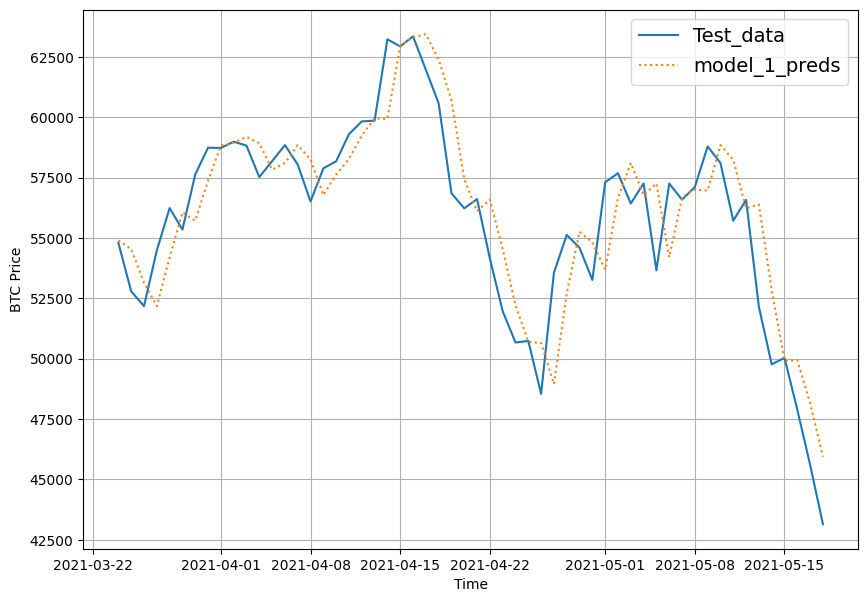

In [42]:
offset = 500
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], # Can't use test_winodws for plotting because of it's dimensionality.
                 values=test_labels[:, 0],
                 start=offset,
                 format="-",
                 label="Test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_1_preds,
                 start=offset,
                 format=":",
                 label="model_1_preds");

## We can also use `autoregressive` models

But what exactly are autoregressive models?

In an autoregression model, we forecast the variable of interest using a linear combination of past values of the variable. The term autoregression indicates that it is a regression of the variable against itself.

$$\hat{y}_{t} = c + {ϕ}_1* y_{t-1} + {ϕ}_2* y_{t-2} + ... + {ϕ}_p* y_{t-p} + {ε}_t$$

We, need to make sure we don't use too many past values as it can lead to overfitting, we need to use the past values that has highest `autocorrelations`.

# Model 2: Dense (window = 30, horizon=1)

In [43]:
HORIZON = 1
WINDOW_SIZE = 30

In [44]:
# Make windows and labels
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2757, 2757)

In [45]:
# Make train and test datasets
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2205, 552, 2205, 552)

In [46]:
tf.random.set_seed(42)

model_2 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
],name='model_2_dense')

model_2.compile(loss='mae',
                optimizer=Adam(),
                metrics=['mae'])

model_2.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks = create_model_checkpoint(model_2.name))

In [47]:
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 790.2740 - mae: 790.2740


[790.2739868164062, 790.2739868164062]

In [48]:
model_2 = tf.keras.models.load_model("model_experiments/model_2_dense/")
model_2.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 617.3235 - mae: 617.3235


[617.323486328125, 617.323486328125]

In [49]:
model_2_preds = make_preds(model_2,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [50]:
# Evaluate results for model 2 predictions
model_2_results = evaluate_preds(y_true=tf.squeeze(test_labels), # remove 1 dimension of test labels
                                 y_pred=model_2_preds)
model_2_results

{'mae': 617.32355,
 'mse': 1296715.0,
 'rmse': 1138.7339,
 'mape': 2.8324594,
 'mase': 1.0790876}

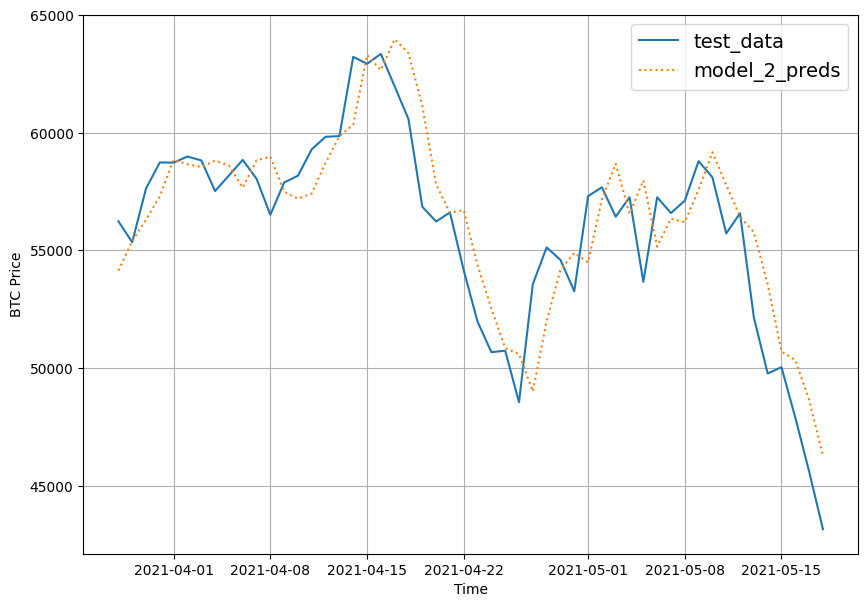

In [51]:
# Ploting the predictions
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format='-',
                 label="test_data")

plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_2_preds,
                 start=offset,
                 format=":",
                 label="model_2_preds")


# Model 3: Dense (window = 30, horizon = 7)

Predicting 7 days ahead, given the past 30 days

In [52]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2751, 2751)

In [53]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)


(2200, 551, 2200, 551)

In [54]:
tf.random.set_seed(42)

model_3 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
], name='model_3_dense')

model_3.compile(loss='mae',
                optimizer=Adam(),
                metrics=['mae'])

model_3.fit(train_windows,
            train_labels,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_3.name)])

In [55]:
# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 1332.6355 - mae: 1332.6355


[1332.635498046875, 1332.635498046875]

In [56]:
# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 1220.0404 - mae: 1220.0404


[1220.0404052734375, 1220.0404052734375]

In [57]:
model_3_preds = make_preds(model_3,
                           input_data=test_windows)

18/18 [==============================] - 0s 2ms/step


In [58]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': 1220.0403,
 'mse': 5289965.5,
 'rmse': 1405.8646,
 'mape': 5.4487147,
 'mase': 2.1709936}

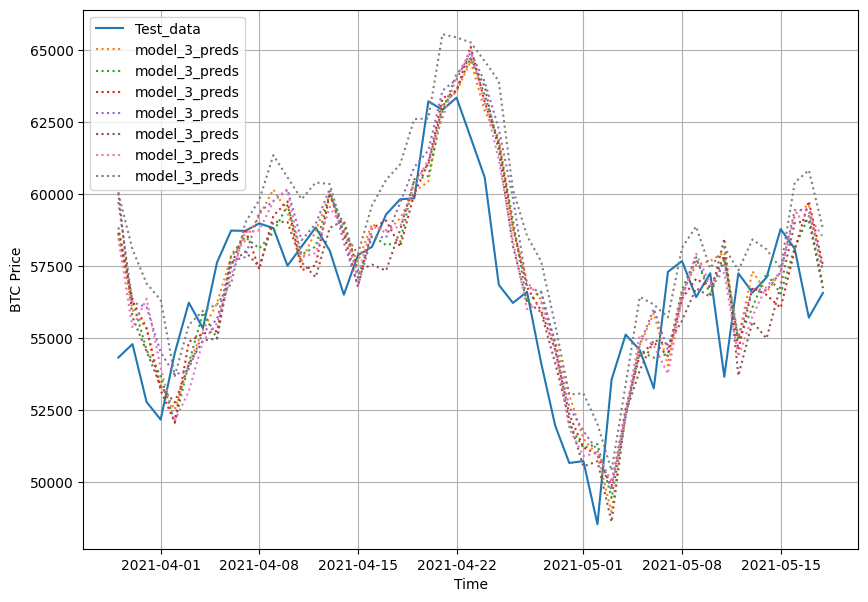

In [59]:
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format='-',
                 label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 format=':',
                 label="model_3_preds")
plt.legend(loc='upper left');

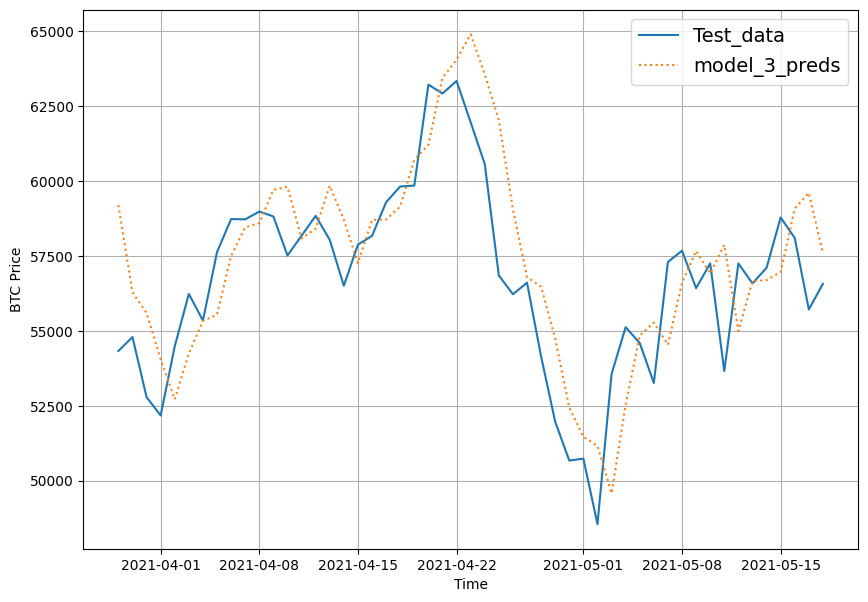

In [60]:
# Aggregating all the model 3 predictions by using tf.reduce_mean()
# This is not a good way of evaluating as we will lose a lot of information, but just to visualize it.
offset = 500
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 format='-',
                 label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.reduce_mean(model_3_preds,axis=1),
                 start=offset,
                 format=':',
                 label="model_3_preds");

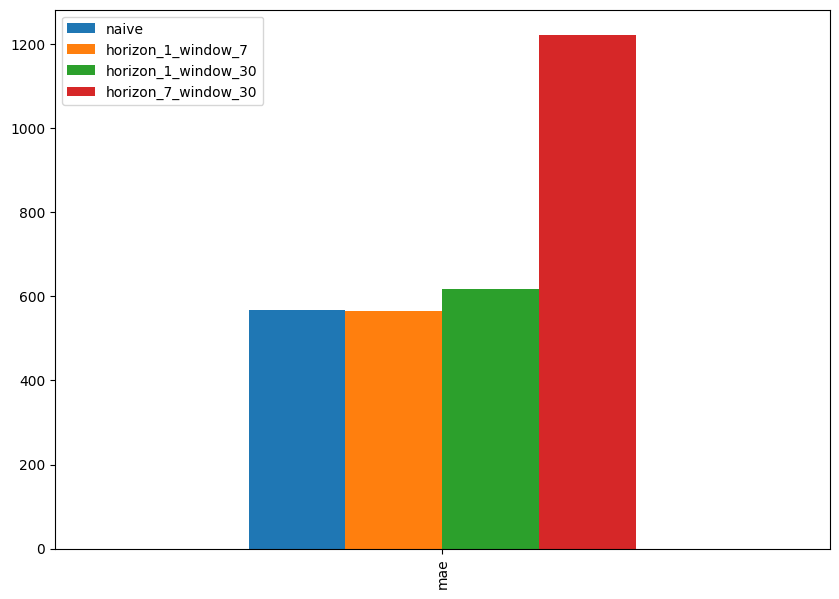

In [61]:
# Comparing all the models we built so far
pd.DataFrame({"naive": naive_results["mae"],
              "horizon_1_window_7": model_1_results["mae"],
              "horizon_1_window_30": model_2_results["mae"],
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");

Woah, our naïve model is performing best (it's very hard to beat a naïve model in open systems) but the dense model with a horizon of 1 and a window size of 7 looks to be performing cloest.

Because of this, we will use `HORIZON=1` and `WINDOW_SIZE=7` for our next series of modelling experiments (in other words, we'll use the previous week of Bitcoin prices to try and predict the next day).

> 🔑 **Note:** Why are the naïve results so good? One of the reasons could be due the presence of **autocorrelation** in the data. If a time series has **autocorrelation** it means the value at `t+1` (the next timestep) is typically close to the value at `t` (the current timestep). In other words, today's value is probably pretty close to yesterday's value. Of course, this isn't always the case but when it is, a naïve model will often get fairly good results.

> 📖 **Resource:** For more on how autocorrelation influences a model's predictions [*How (not) to use Machine Learning for time series forecasting: Avoiding the pitfalls*](https://towardsdatascience.com/how-not-to-use-machine-learning-for-time-series-forecasting-avoiding-the-pitfalls-19f9d7adf424) by Vegard Flovik

# Model 4 (Conv1D)

This time we will be using a `conv1d` model because it can be used for seq2seq problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

![bitcoin prediction in seq2seq terms](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-bitcoin-forecast-in-seq2seq-terms.png)
*Framing Bitcoin forecasting in seq2seq (sequence to sequence) terms. Using a window size of 7 and a horizon of one results in a many to one problem. Using a window size of >1 and a horizon of >1 results in a many to many problem. The diagram comes from Andrei Karpathy's [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/)*.


In [62]:
HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [63]:
# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [64]:
# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

In [65]:
train_windows[0].shape

(7,)

Since we're going to be using [Conv1D layers](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D), we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: `(batch_size, timesteps, input_dim)`.

In our case, the `batch_size` (by default this is 32 but we can change it) is handled for us but the other values will be:
* `timesteps = WINDOW_SIZE` - the `timesteps` is also often referred to as `features`, our features are the previous `WINDOW_SIZE` values of Bitcoin
* `input_dim = HORIZON` - our model views `WINDOW_SIZE` (one week) worth of data at a time to predict `HORIZON` (one day)

Right now, our data has the `timesteps` dimension ready but we'll have to adjust it to have the `input_dim` dimension.

In [66]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])

expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))

print(f"Original shape: {x.shape}")
print(f"Expanded shape: {expand_dims_layer(x).shape}")
print(f"After expansion of the dimension:\n {expand_dims_layer(x)}")

Original shape: (7,)
Expanded shape: (7, 1)
After expansion of the dimension:
 [[123.65499]
 [125.455  ]
 [108.58483]
 [118.67466]
 [121.33866]
 [120.65533]
 [121.795  ]]


In [67]:
tf.random.set_seed(42)

model_4 = Sequential([
    layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
    layers.Conv1D(128, 5, padding='causal', activation='relu'),
    layers.Dense(HORIZON)
], name='model_4_conv1d')

model_4.compile(loss='mae',
                optimizer=Adam(),
                metrics=['mae'])

model_4.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_4.name)])

In [68]:
model_4.summary()

Model: "model_4_conv1d"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_1 (Lambda)           (None, 1, 7)              0         
                                                                 
 conv1d (Conv1D)             (None, 1, 128)            4608      
                                                                 
 dense_6 (Dense)             (None, 1, 1)              129       
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [69]:
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 4ms/step - loss: 608.6814 - mae: 608.6814


[608.681396484375, 608.681396484375]

In [70]:
model_4 = tf.keras.models.load_model("model_experiments/model_4_conv1d")
model_4.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 572.7288 - mae: 572.7288


[572.728759765625, 572.728759765625]

In [71]:
model_4_preds = make_preds(model_4, test_windows)

18/18 [==============================] - 0s 2ms/step


In [72]:
# Evaluate predictions
model_4_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_4_preds)
model_4_results

{'mae': 572.7289,
 'mse': 1184853.4,
 'rmse': 1088.5096,
 'mape': 2.5676918,
 'mase': 1.006126}

# Model 5: RNN (LSTM)

In [73]:
tf.random.set_seed(42)

input_layers = layers.Input(shape=(7,))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(input_layers)
x = layers.LSTM(128, 'relu')(x)
output_layers = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(input_layers, output_layers, name='model_5_lstm')

model_5.compile(loss='mae',
                optimizer=Adam(),
                metrics=['mae'])

model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_5.name)])

In [74]:
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 2ms/step - loss: 589.0297 - mae: 589.0297


[589.0296630859375, 589.0296630859375]

In [75]:
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

18/18 [==============================] - 0s 3ms/step - loss: 573.4961 - mae: 573.4961


[573.49609375, 573.49609375]

To meet the criteria: https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM

In [76]:
model_5_preds = make_preds(model_5, test_windows)

18/18 [==============================] - 0s 2ms/step


In [77]:
model_5_results = evaluate_preds(tf.squeeze(test_labels), model_5_preds)
model_5_results

{'mae': 573.4961,
 'mse': 1191209.2,
 'rmse': 1091.4253,
 'mape': 2.5735645,
 'mase': 1.0074738}

Hmmm... it seems even with an LSTM-powered RNN we weren't able to beat our naïve models results.

Perhaps adding another variable will help?

> 🔑 **Note:** Neural networks are such powerful algorithms, they can be used for almost any problem, however, that doesn't mean they'll achieve performant or usable results.

# Model 6: Dense (multivariate time series)

To keep things simple, let's the `model_1` architecture and use it to train and make predictions on our multivariate time series data.

By replicating the `model_1` architecture we'll be able to see whether or not adding the block reward feature improves or detracts from model performance.

## Making a multivariate time series

If predicting the price of Bitcoin using the price of Bitcoin hasn't worked out very well, maybe giving our model more information may help.

More information is a vague term because we could actually feed almost anything to our model(s) and they would still try to find patterns.

What would be better is if we passed our model something related to Bitcoin (again, this is quite vauge, since in an open system like a market, you could argue everything is related).

This will be different for almost every time series you work on but in our case, we could try to see if the [Bitcoin block reward size](https://www.investopedia.com/terms/b/block-reward.asp) adds any predictive power to our model(s).

What is the Bitcoin block reward size?

The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

At its inception, the Bitcoin block reward size was 50.

But every four years or so, the Bitcoin block reward halves.

For example, the block reward size went from 50 (starting January 2009) to 25 on November 2012.

Let's encode this information into our time series data and see if it helps a model's performance.

> 🔑 **Note:** Adding an extra feature to our dataset such as the Bitcoin block reward size will take our data from **univariate** (only the historical price of Bitcoin) to **multivariate** (the price of Bitcoin as well as the block reward size).

In [78]:
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


We need to add another feature column, the `block reward` size.

The following block rewards and dates were sourced from [cmcmarkets.com](https://www.cmcmarkets.com/en/learn-cryptocurrencies/bitcoin-halving).

| Block Reward | Start Date |
| ----- | ----- |
| 50 | 3 January 2009 (2009-01-03) |
| 25 | 28 November 2012 |
| 12.5 | 9 July 2016 |
| 6.25 | 11 May 2020 |
| 3.125 | TBA (expected 2024) |
| 1.5625 | TBA (expected 2028) |

> 🔑 **Note:** Since our Bitcoin historical data starts from 01 October 2013, none of the timesteps in our multivariate time series will have a block reward of 50.

In [79]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (our data starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

In [80]:
block_rewards_2_datetime = np.datetime64("2012-11-28")
block_rewards_3_datetime = np.datetime64("2016-07-09")
block_rewards_4_datetime = np.datetime64("2020-05-11")

We're going to get the days (indexes) for different block reward values.

This is important because if we're going to use multiple variables for our time series, they should have the same frequency as our original variable. For example, if our Bitcoin prices are daily, we need the block reward values to be daily as well.

> 🔑 **Note:** For using multiple variables, make sure they're the same frequency as each other. If the variables aren't at the same frequency (e.g. Bitcoin prices are daily but block rewards are weekly), we may need to transform them in a way that they can be used with your model.

In [81]:
block_rewards_2_days = (block_rewards_3_datetime-bitcoin.index[0]).days
block_rewards_3_days = (block_rewards_4_datetime-bitcoin.index[0]).days
block_rewards_2_days, block_rewards_3_days

(1012, 2414)

In [82]:
bitcoin_block = bitcoin.copy()
bitcoin_block['Block Reward'] = None

In [83]:
bitcoin_block.iloc[:block_rewards_2_days, -1] = block_reward_2
bitcoin_block.iloc[block_rewards_2_days:block_rewards_3_days, -1] = block_reward_3
bitcoin_block.iloc[block_rewards_3_days:, -1] = block_reward_4
bitcoin_block.head()

,Price,Block Reward
Date,,
2013-10-01,123.65499,25
2013-10-02,125.45500,25
2013-10-03,108.58483,25
2013-10-04,118.67466,25
2013-10-05,121.33866,25


In [84]:
# Plot the block reward over time
# Note: Because of the different scales in of our values we will scale them to be between 0 and 1
from sklearn.preprocessing import minmax_scale


scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_block[['Price', 'Block Reward']]),
                                     columns=bitcoin_block.columns,
                                     index=bitcoin_block.index)
scaled_price_block_df.head()

,Price,Block Reward
Date,,
2013-10-01,0.000238,1.0
2013-10-02,0.000267,1.0
2013-10-03,0.000000,1.0
2013-10-04,0.000160,1.0
2013-10-05,0.000202,1.0


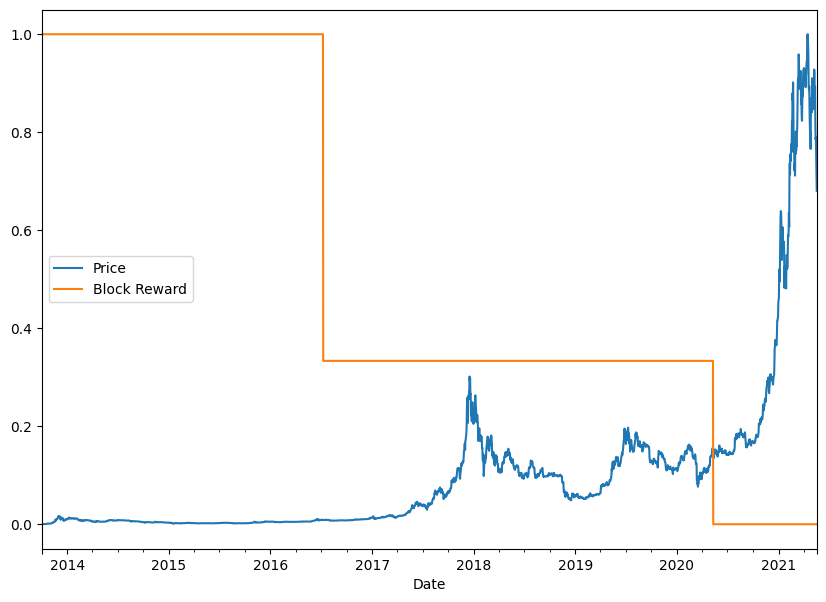

In [85]:
scaled_price_block_df.plot(figsize=(10, 7));

## Making a windowed dataset with pandas

Previously, we've turned our univariate time series into windowed datasets using functions.

Since we got multivariate data, these functions won't work.

However, we can use pandas.DataFrame.shift() to window our multivariate data [`pandas.DataFrame.shift()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)

The `shift()` method offsets an index by a specified number of periods.


In [86]:
# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [87]:
bitcoin_prices_windowed = bitcoin_block.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_windowed[f"Prices{i+1}"] = bitcoin_prices_windowed["Price"].shift(i+1)

bitcoin_prices_windowed.head(10)

,Price,Block Reward,Prices1,Prices2,Prices3,Prices4,Prices5,Prices6,Prices7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN
2013-10-06,120.65533,25,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN
2013-10-07,121.79500,25,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499,NaN
2013-10-08,123.03300,25,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500,123.65499
2013-10-09,124.04900,25,123.03300,121.79500,120.65533,121.33866,118.67466,108.58483,125.45500


In [88]:
X = bitcoin_prices_windowed.dropna().drop('Price', axis=1).astype(np.float32) # TensorFlow likes float32
y = bitcoin_prices_windowed.dropna()['Price'].astype(np.float32)

In [89]:
# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2224, 2224, 556, 556)

In [90]:
# Creating mutlitple inputs for train data
train_input1 = X_train.drop('Block Reward', axis=1)
train_input2 = X_train['Block Reward']

# Creating mulitple inputs for test data
test_input1 = X_test.drop('Block Reward', axis=1)
test_input2 = X_test['Block Reward']

# Inputs for multivariate model
X_train_multi = (train_input1, train_input2)
X_test_multi = (test_input1, test_input2)

In [91]:
# Creating a hybrid multivariate model
tf.random.set_seed(42)

# Normal model
inputs = layers.Input(shape=(7,))
outputs = layers.Dense(128, activation='relu')(inputs)
normal_model = tf.keras.Model(inputs, outputs, name='normal_model')

# Block reward model
input_blocks = layers.Input(shape=(1,))
output_blocks = layers.Dense(32, activation='relu')(input_blocks)
block_model = tf.keras.Model(input_blocks, output_blocks)

# Hybrid model
hybrid_layer = layers.Concatenate(name='hybrid_layer')([normal_model.output, block_model.output])
output = layers.Dense(HORIZON)(hybrid_layer)

model_6 = tf.keras.Model(inputs=[normal_model.input, block_model.input],
                         outputs=output, name='model_6_multivariate')

In [92]:
model_6.summary()

Model: "model_6_multivariate"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 7)]          0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 dense_8 (Dense)                (None, 128)          1024        ['input_2[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 32)           64          ['input_3[0][0]']                
                                                                               

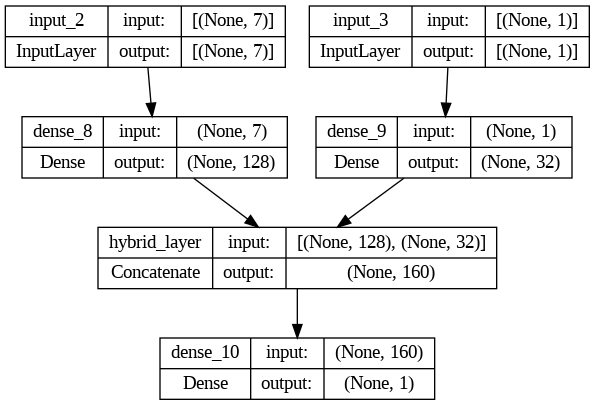

In [93]:
tf.keras.utils.plot_model(model_6, show_shapes=True)

In [94]:
model_6.compile(loss='mae',
                optimizer=Adam())

model_6.fit(X_train_multi,
            y_train,
            epochs=100,
            batch_size=128,
            verbose=0,
            validation_data=(X_test_multi, y_test),
            callbacks=[create_model_checkpoint(model_6.name)])

In [95]:
model_6.evaluate(X_test_multi, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 608.6891


608.6890869140625

In [96]:
model_6 = tf.keras.models.load_model("model_experiments/model_6_multivariate")
model_6.evaluate(X_test_multi, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 567.7961


567.796142578125

In [97]:
model_6_preds = make_preds(model_6, X_test_multi).numpy()

18/18 [==============================] - 0s 2ms/step


In [98]:
model_6_results = evaluate_preds(y_test, model_6_preds)
model_6_results

{'mae': 567.79614,
 'mse': 1170940.8,
 'rmse': 1082.1001,
 'mape': 2.553903,
 'mase': 0.99746054}

In [99]:
model_1_results

{'mae': 564.2149,
 'mse': 1158016.8,
 'rmse': 1076.1118,
 'mape': 2.513272,
 'mase': 0.99116933}

Seems like adding block reward didn't yield much. Not to worry, it is all part of experimentation

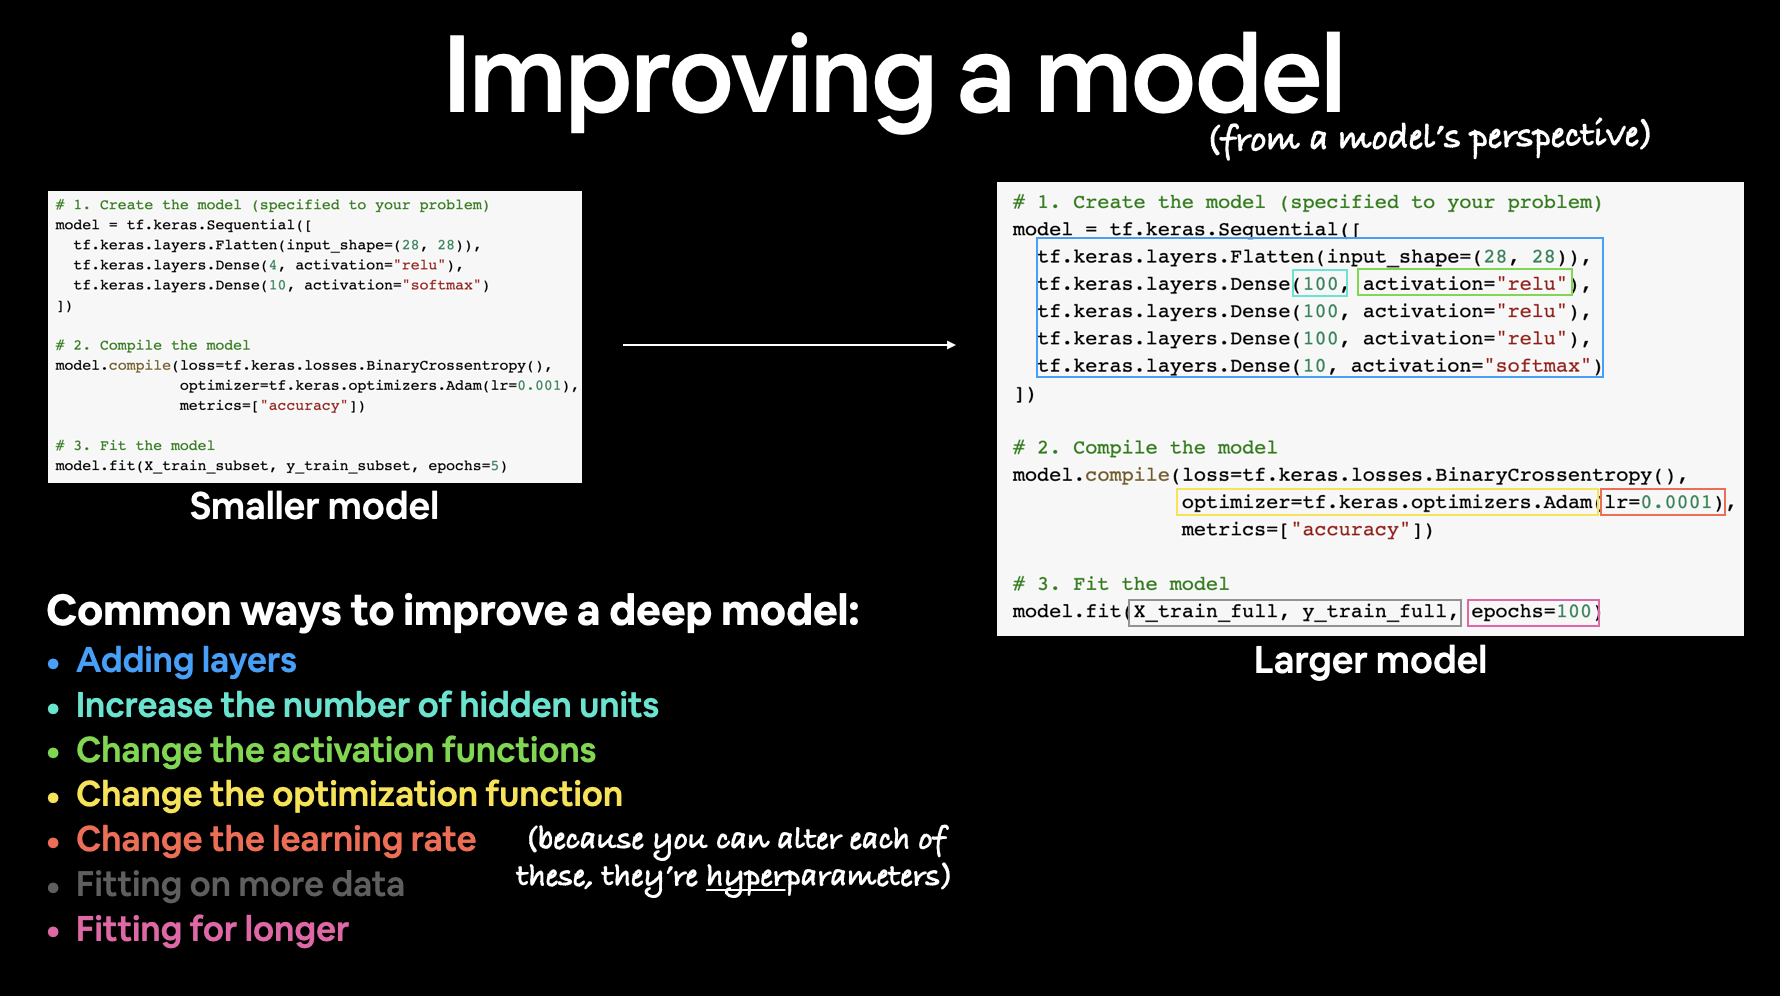

# Model 7 (N-BEATS Algorithm)

So far we've tried a bunch of smaller models, models with only a couple of layers.

But one of the best ways to improve a model's performance is to increase the number of layers in it.

That's exactly what the [N-BEATS (Neural Basis Expansion Analysis for Interpretable Time Series Forecasting) algorithm](https://arxiv.org/pdf/1905.10437.pdf) does.

The N-BEATS algorithm focuses on univariate time series problems and achieved state-of-the-art performance in the winner of the [M4 competition](https://www.sciencedirect.com/science/article/pii/S0169207019301128) (a forecasting competition).

For our next modelling experiment we're going to be replicating the **generic architecture** of the N-BEATS algorithm (see [section 3.3 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)).

We're not going to go through all of the details in the paper, instead we're going to focus on:
1. Replicating the model architecture in [Figure 1 of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

![figure 1 from N-BBEATS paper, the algorithm we're going to build](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-figure-1-nbeats-paper-annotated.png)
*N-BEATS algorithm we're going to replicate with TensorFlow with window (input) and horizon (output) annotations.*

2. Using the same hyperparameters as the paper which can be found in [Appendix D of the N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)

Doing this will give us an opportunity to practice:
* Creating a custom layer for the `NBeatsBlock` by subclassing [`tf.keras.layers.Layer`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Layer)
  * Creating a custom layer is helpful for when TensorFlow doesn't already have an existing implementation of a layer or if you'd like to make a layer configuration repeat a number of times (e.g. like a stack of N-BEATS blocks)
* Implementing a custom architecture using the Functional API
* Finding a paper related to our problem and seeing how it goes

> 🔑 **Note:** As you'll see in the paper, the authors state “N-BEATS is implemented and trained in TensorFlow”, that's what we'll be doing too!


## Building and Tesing the N-BEATS block layers

Because the N-BEATS block layer does not exist in TensorFlow, we need to create it.

To create custom layers and models in TensoFlow we can use subclassing: https://www.tensorflow.org/guide/keras/making_new_layers_and_models_via_subclassing

Step 1

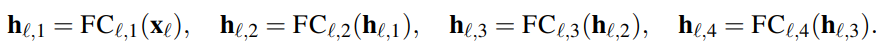

Step 2

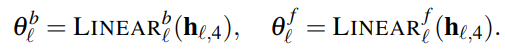

In [100]:
# Create NBeatsBlock custom layer
class NBeatsBlock(tf.keras.layers.Layer):
  def __init__(self,
               input_size: int, # window_size
               theta_size: int,# size of theta layer
               horizon: int, # horizon
               n_neurons: int,# number of neurons within a single layer
               n_layers: int,# number of layers for the whole block
               **kwargs):
    super().__init__(**kwargs)
    self.input_size = input_size
    self.theta_size = theta_size
    self.horizon = horizon
    self.n_neurons = n_neurons
    self.n_layers = n_layers

    # Step 1
    self.hidden = [tf.keras.layers.Dense(n_neurons, 'relu') for _ in range(n_layers)]

    # Step 2
    self.theta_layer = tf.keras.layers.Dense(theta_size, 'linear', name='theta')

  # Now, we use call method for transformation of input to output
  # Our block input is window_size and our output is forecast and backcast
  def call(self, inputs):
    x = inputs
    for layer in self.hidden:
      x = layer(x)
    theta = self.theta_layer(x)
    # Now, we will split theta into two parts, forecast and backcast, for that we will use indexing
    backcast, forecast = theta[:,:self.input_size], theta[:,-self.horizon:]
    return backcast, forecast

*Using TensorFlow layer subclassing to replicate the N-BEATS basic block. See section 3.1 of N-BEATS paper for details.*

Let's see our block replica in action by creating a dummy version of `NBeatsBlock`.



In [101]:
# When nerual network gets instantiated, they are given random weights, that is why we set seed
tf.random.set_seed(42)

dummy_nbeats_block = NBeatsBlock(input_size=WINDOW_SIZE,
                                 theta_size=WINDOW_SIZE+HORIZON,
                                 horizon=HORIZON,
                                 n_neurons=128,
                                 n_layers=4)

In [102]:
dummy_inputs = tf.expand_dims(tf.range(WINDOW_SIZE), axis=0)
backcast, forecast = dummy_nbeats_block(dummy_inputs)

print(f"Backcast: {tf.squeeze(backcast)}")
print(f"Forecast: {tf.squeeze(forecast)}")

Backcast: [ 0.12874666 -0.35852918 -0.6535571   0.02616469  0.0174451  -0.06256495
  0.31914327]
Forecast: -0.023555949330329895


## Creating high perfromant tensorflow pipeline

As N-BEATS model is a heavy model, we need to create high performant pipelines to accelerate the speed.

In [103]:
def create_dataset(inputs, labels , batch_size=32):
  data = tf.data.Dataset.from_tensor_slices(inputs)
  data_label = tf.data.Dataset.from_tensor_slices(labels)
  dataset = tf.data.Dataset.zip((data, data_label))
  dataset = dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)
  return dataset

### Getting the data ready for NBEATS

In [104]:
bitcoin.head()

,Price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


In [105]:
# Creating the windowed dataset
bitcoin_prices_nbeats = bitcoin.copy()

for i in range(WINDOW_SIZE):
  bitcoin_prices_nbeats[f"Price{i+1}"] = bitcoin_prices_nbeats["Price"].shift(i+1)

bitcoin_prices_nbeats.head()

,Price,Price1,Price2,Price3,Price4,Price5,Price6,Price7
Date,,,,,,,,
2013-10-01,123.65499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [106]:
# Make features and label
X = bitcoin_prices_nbeats.dropna().drop("Price", axis=1)
y = bitcoin_prices_nbeats.dropna()["Price"]

# Make train and test splits
split_size = int(0.8*len(X))
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

In [107]:
# Creating the datasets
BATCH_SIZE = 1024 # Taken from Appendix D in N-BEATS paper.

train_dataset = create_dataset(X_train, y_train, batch_size=BATCH_SIZE)
test_dataset = create_dataset(X_test, y_test, batch_size=BATCH_SIZE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

## Setting up hyperparameters for N-BEATS algorithm

N-BEATS algorithm has a fair few number of parameters, it can be found in table 18 of the paper: https://arxiv.org/pdf/1905.10437.pdf

![table 18 from N-BEATS paper](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-nbeats-table-18-hyperparameters.png)

We will be replicating N-BEATS-G (N-BEATS General).

They used an ensemble of models (2H, 3H, .., 7H).

For simplicity we will be using one model with look back period 1H (`horizon`=1)

In [108]:
# Values from N-BEATS paper
N_EPOCHS= 5000
N_NEURONS = 512
N_LAYERS = 4
N_STACKS = 30

INPUT_SIZE = WINDOW_SIZE * HORIZON #Obviously as horizon increases, we need to increase the input size.
THETA_SIZE = WINDOW_SIZE + HORIZON

## Getting ready for residual connections

Beautiful! Hyperparameters ready, now before we create the N-BEATS model, there are two layers to go through which play a large roll in the architecture.

They're what make N-BEATS **double residual stacking** (section 3.2 of the [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)) possible:
* [`tf.keras.layers.subtract(inputs: iterable)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/subtract)
* [`tf.keras.layers.add(inputs: iterable)`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/add)

In [109]:
# Trying these on dummy values

tensor_1 = tf.range(10) + 10
tensor_2 = tf.range(10)

subtracted = tf.keras.layers.subtract([tensor_1, tensor_2])
added = tf.keras.layers.add([tensor_1, tensor_2])

print(f"Added: {added}")
print(f"Subtracted {subtracted}")

Added: [10 12 14 16 18 20 22 24 26 28]
Subtracted [10 10 10 10 10 10 10 10 10 10]


## Building, compiling and fitting the N-BEATS algorithm

We will be following these steps:
1. Setup an instance of the N-BEATS block layer using `NBeatsBlock` (this will be the initial block of the network, the rest will be created as part of stacks)
2. Create an input layer for the N-BEATS stack
3. Make the initial backcast and forecast for the model with the layer created in (1) and create subtraction residual link.
4. Use a for loop to create stacks of block layers.
5. Use the NBeatsBlock class within the for loop created in (4) to create blocks which return backcasts and block-level forecasts.
6. Create the double residual stacking using subtract and add layers
7. Put the model inputs and outputs together using `tf.keras.Model()`.
8. Compile the model with MAE loss (the paper uses multiple losses but we will use MAE to keep it inline with other models) and Adam optimizer with default settings as per section 5.2 of [N-BEATS paper](https://arxiv.org/pdf/1905.10437.pdf)
9. Fit the N-BEATS paper 5000 epochs and since it's fitting for so many epochs, we will use multiple callbacks:
  * [`tf.keras.callbacks.EarlyStopping()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) - stop the model from training if it does not improve validation loss for 200 epochs and restore the best performing weights using `restore_best_weights=True` (this will prevent model from learning for long period of time without any improvement).
  * [`tf.keras.callbacks.ReduceLROnPlateau()`](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/ReduceLROnPlateau) - if the model validation loss doesn't improve for 100 epochs, reduce the learning rate by 10x to try and help it make incremental improvements.


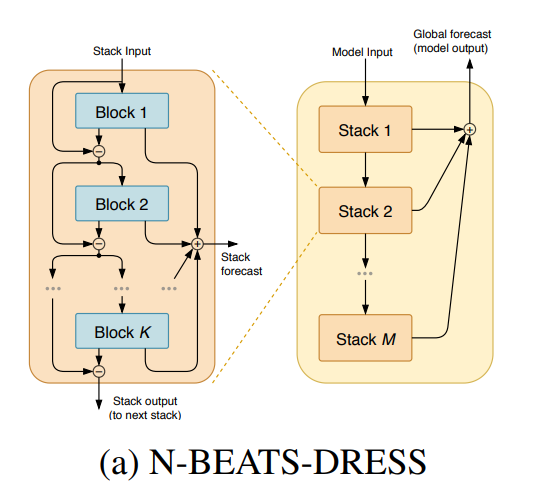

### Formula for residuals

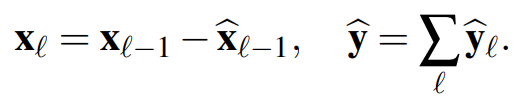

In [110]:
%%time

tf.random.set_seed(42)

# 1. Set up an N-BEATS block layer
nbeats_block_layer = NBeatsBlock(input_size=INPUT_SIZE,
                                 theta_size=THETA_SIZE,
                                 horizon=HORIZON,
                                 n_neurons=N_NEURONS,
                                 n_layers=N_LAYERS,
                                 name="InitialBlock")

# 2. Create inputs to stack
stack_layer = layers.Input(shape=INPUT_SIZE, name='stack_layer')

# 3. Inital forecast and backcast and add in subtraction residual link
backcast, forecast = nbeats_block_layer(stack_layer)

residuals = layers.subtract([stack_layer, backcast], name='subtract_00')

# 4. Create stacks of blocks
for i in range(N_STACKS-1):
  # 5. Use NBeatsBlock to create backcast and block forecast
  backcast, block_forecast = NBeatsBlock(input_size=INPUT_SIZE,
                                         theta_size=THETA_SIZE,
                                         horizon=HORIZON,
                                         n_neurons=N_NEURONS,
                                         n_layers=N_LAYERS,
                                         name=f"NBeatsBlock_{i}")(residuals)

  # 6. Create double residual stacking
  residuals = layers.subtract([residuals, block_forecast], name=f"subtract_{i}")
  forecast = layers.add([forecast, block_forecast], name=f"add_{i}")

# 7. Putting all stacks together and creating the model
model_7 = tf.keras.Model(inputs=stack_layer, outputs=forecast)

# 8. Compiling the model with mae loss Adam optimizer
model_7.compile(loss='mae',
                optimizer=Adam())

# 9. Fitting the model with EarlyStopping and ReduceLROnPlateau callbacks
model_7.fit(train_dataset,
            epochs=N_EPOCHS,
            validation_data=test_dataset,
            verbose=0,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                        patience=200,
                                                        restore_best_weights=True),
                       tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                            patience=100,
                                                            verbose=1)])


Epoch 157: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 257: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
CPU times: user 1min 40s, sys: 2.01 s, total: 1min 42s
Wall time: 1min 56s


In [111]:
# Evaluate N-BEATS model on test_dataset
model_7.evaluate(test_dataset)

1/1 [==============================] - 0s 23ms/step - loss: 566.8043


566.8043212890625

In [112]:
# Make predictions on N-BEATS model
model_7_preds = make_preds(model_7, test_dataset)
model_7_preds[:10]

1/1 [==============================] - 1s 1s/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([8838.807, 8810.436, 9063.455, 8747.865, 8807.479, 8784.77 ,
       8650.45 , 8505.734, 8514.921, 8530.421], dtype=float32)>

In [113]:
# Evaluate N-BEATS model prediction
model_7_results = evaluate_preds(y_test,model_7_preds)
model_7_results

{'mae': 566.8043,
 'mse': 1092414.6,
 'rmse': 1045.1864,
 'mape': 2.5871007,
 'mase': 0.9957182}

## Ploting the N-BEATS architecture we created

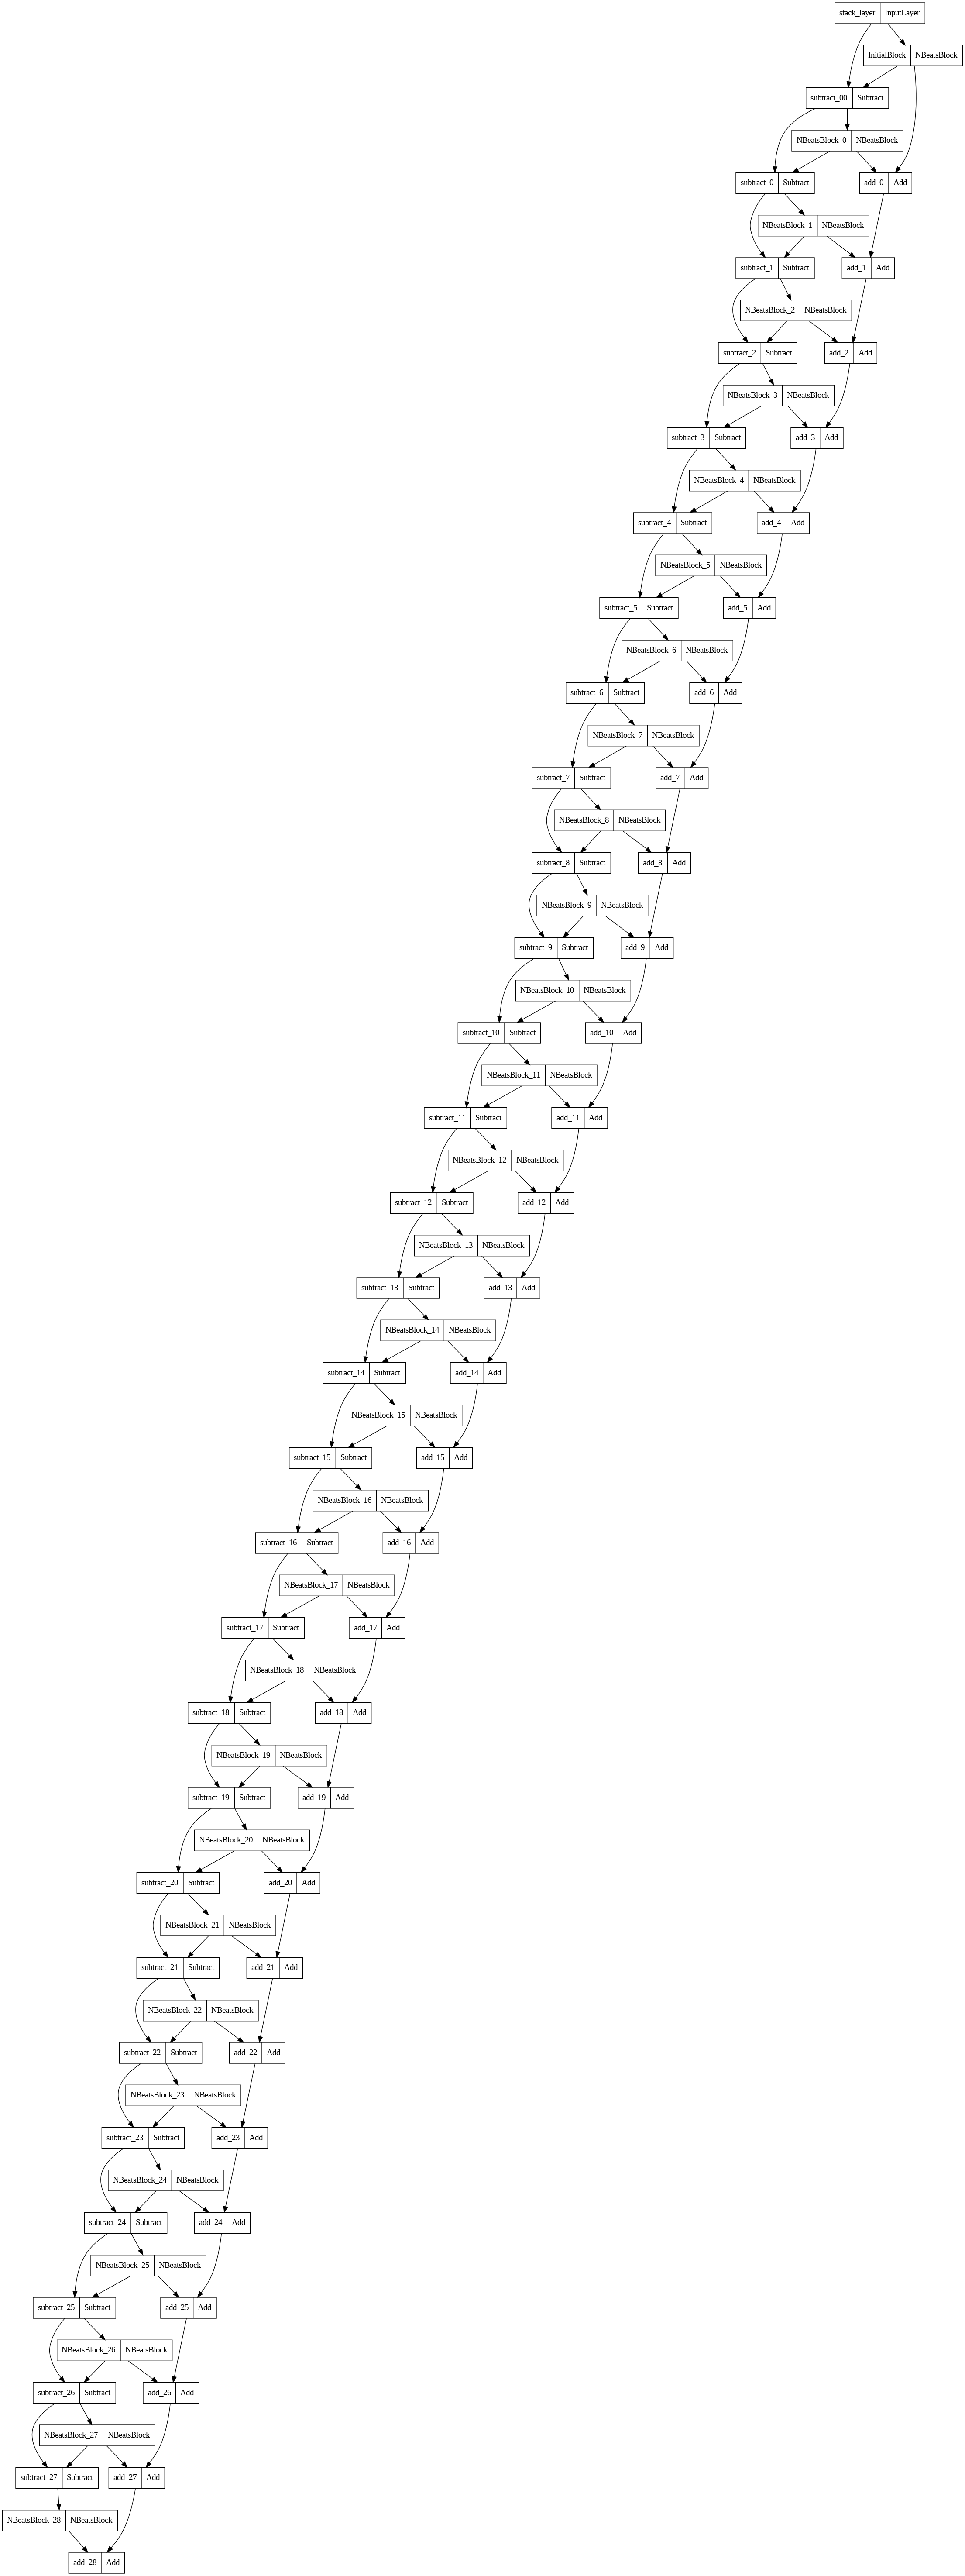

In [114]:
# Plot the N-BEATS model and inspect the architecture
from tensorflow.keras.utils import plot_model
plot_model(model_7)

# Model 8 (ensemble of models)

After all that effort, N-BEATS algorithm's performance was underwhelming. But then again, not everything will work. That's why we "experiment, experiment experiment". Our next experiment is creating an [**ensemble** of models](https://en.wikipedia.org/wiki/Ensemble_learning).

An **ensemble** involves training and combining multiple different models on the same problem. Ensemble models often gives the highest perfromance because of its diversity.

The original N-BEATS-G model in the paper was trained using ensemble of models (180 in total, see [section 3.4](https://arxiv.org/pdf/1905.10437.pdf)) to achieve these results, they used:
  * Different loss functions (sMAPE, MASE and MAPE)
  * Different window sizes (2 x horizon, 3 x horizon, 4 x horizon...)

The benefit of ensembling models is you get the "decision of the crowd effect". Rather than relying on a single model's predictions, you can [take the average or median of many different models](https://en.wikipedia.org/wiki/Ensemble_forecasting).

To create our ensemble models we're going to be using a combination of:
* Different loss functions (MAE, MSE, MAPE)
* Randomly initialized models

And hopefully the combined predictive power of each model is better than a single model on its own.

We'll start by creating a function to produce a list of different models trained with different loss functions. Each layer in the ensemble models will be initialized with a random normal [(Gaussian) distribution](https://en.wikipedia.org/wiki/Normal_distribution) using [He normal initialization](https://www.tensorflow.org/api_docs/python/tf/keras/initializers/HeNormal), this'll help estimating the prediction intervals later on.

> 🔑 **Note:** In machine leanring experiments, we have already dealt with examples of ensemble models. Algorithms such as the [random forest model](https://towardsdatascience.com/understanding-random-forest-58381e0602d2) are a form of ensemble, it uses a number of randomly created decision trees where each individual tree may perform poorly but when combined gives great results.


In [115]:
# Get the data
train_dataset = create_dataset(X_train, y_train, BATCH_SIZE)
test_dataset = create_dataset(X_test, y_test, BATCH_SIZE)

train_dataset, test_dataset

(<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

In [116]:
def get_ensemble_models(horizon=HORIZON,
                        train_data=train_dataset,
                        test_data=test_dataset,
                        num_iter=10,
                        num_epochs=100,
                        loss_fns=['mae', 'mse', 'mape']):

  """
  Returns a list of ensemble models each trained on MAE, MSE, MAPE loss.

  For example, if num_iter=10, a list of 30 trained models will be returned:
  10 * len(['mae', 'mse', 'mape'])
  """

  ensemble_models = []

  for i in range(num_iter):
    for loss_function in loss_fns:
      print(f"Optimizing model by reducing: {loss_function} for {num_epochs} epochs, model number: {i}")

      # Construct a simple model
      model = tf.keras.Sequential([
          # Initialize layers with normal (Gaussian) distribution for estimating prediction intervals later on
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(128, kernel_initializer='he_normal', activation='relu'),
          layers.Dense(HORIZON)
      ])

      # Compiling the model
      model.compile(loss=loss_function,
                    optimizer=Adam(),
                    metrics=['mae', 'mse'])

      # Fiting the model
      model.fit(train_dataset,
                epochs=num_epochs,
                validation_data=test_dataset,
                verbose=0,
                callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                            patience=200,
                                                            restore_best_weights=True),
                           tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                                                patience=100,
                                                                verbose=1)])
      # Appending all the models
      ensemble_models.append(model)
  return ensemble_models

In [117]:
%%time
# Get list of trained ensemble models
ensemble_models = get_ensemble_models(num_iter=5,
                                      num_epochs=1000)

Optimizing model by reducing: mae for 1000 epochs, model number: 0
Optimizing model by reducing: mse for 1000 epochs, model number: 0

Epoch 522: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 622: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 0

Epoch 248: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 348: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mae for 1000 epochs, model number: 1

Epoch 805: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
Optimizing model by reducing: mse for 1000 epochs, model number: 1

Epoch 652: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 752: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.
Optimizing model by reducing: mape for 1000 epochs, model number: 1

Epoch 161: ReduceLROnPlateau reduci

In [118]:
# Create a function that takes a list of trained models and returns a list of predictions
def make_ensemble_preds(models, data):
  ensemble_preds = []
  for model in models:
    preds = model.predict(data)
    ensemble_preds.append(preds)

  return tf.squeeze(ensemble_preds)

In [119]:
%%time

# Make predicitons

ensemble_preds = make_ensemble_preds(ensemble_models, test_dataset)
ensemble_preds[:5]

1/1 [==============================] - 0s 39ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 45ms/step
CPU times: user 731 ms, sys: 26.2 ms, total: 757 ms
Wall time: 859 ms


<tf.Tensor: shape=(5, 556), dtype=float32, numpy=
array([[ 8827.171,  8797.769,  9114.809, ..., 50124.656, 49362.094,
        46019.527],
       [ 8779.976,  8762.493,  9138.715, ..., 50246.484, 48093.902,
        45853.61 ],
       [ 8797.473,  8780.218,  9030.184, ..., 49984.184, 47513.188,
        45707.902],
       [ 8781.755,  8784.506,  9061.907, ..., 49996.992, 47941.855,
        46122.387],
       [ 8829.403,  8734.261,  9017.658, ..., 49815.855, 48976.82 ,
        46259.65 ]], dtype=float32)>

In [120]:
model_8_results = evaluate_preds(y_test,
                                 np.median(ensemble_preds, axis=0))

model_8_results

{'mae': 567.953,
 'mse': 1147455.6,
 'rmse': 1071.1935,
 'mape': 2.5611877,
 'mase': 0.9977361}

Nice! Looks like the ensemble model is the best performing model on the MAE metric so far.

### Plotting the prediction intervals (uncertainty estimates) of our ensemble

Right now all of our model's (prior to the ensemble model) are predicting single points.

Meaning, given a set of `WINDOW_SIZE=7` values, the model will predict `HORIZION=1`.

But what might be more helpful than a single value?

Perhaps a range of values?

For example, if a model is predicting the price of Bitcoin to be 50,000USD tomorrow, would it be helpful to know it's predicting the 50,000USD because it's predicting the price to be between 48,000 and 52,000USD?

Because **point predictions** are almost always going to be wrong. So having a range of values can help with decision making.

![example of Uber's prediction intervals for daily completed trips in San Francisco](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-intervals-from-ubers-uncertainty-measures.png)
 The image comes from Uber's [blog post on uncertainty estimation in neural networks](https://eng.uber.com/neural-networks-uncertainty-estimation/).




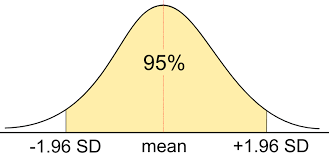



One way of getting the 95% condfidnece prediction intervals for a deep learning model is the bootstrap method:
1. Take the predictions from a number of randomly initialized models.
2. Measure the standard deviation of the predictions.
3. Multiply standard deviation by [1.96](https://en.wikipedia.org/wiki/1.96) (assuming the distribution is Gaussian, 95% of observations fall within 1.96 standard deviations of the mean, this is why we initialized our neural networks with a normal distribution, `he_normal`).
4. To get the prediction interval upper and lower bounds, add and subtract the value obtained in (3) to the mean/median of the predictions made in (1).



In [121]:
# Find the upper and lower bounds of ensemble
def get_upper_lower(preds):
  std = tf.math.reduce_std(preds, axis=0)
  preds_mean = tf.math.reduce_mean(preds, axis=0)
  interval = 1.96*std
  lower, upper = preds_mean - interval, preds_mean + interval

  return lower, upper

In [122]:
lower, upper = get_upper_lower(ensemble_preds)

Now that we got upper and lower boundaries, lets plot them using: [`matplotlib.pyplot.fill_between()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)

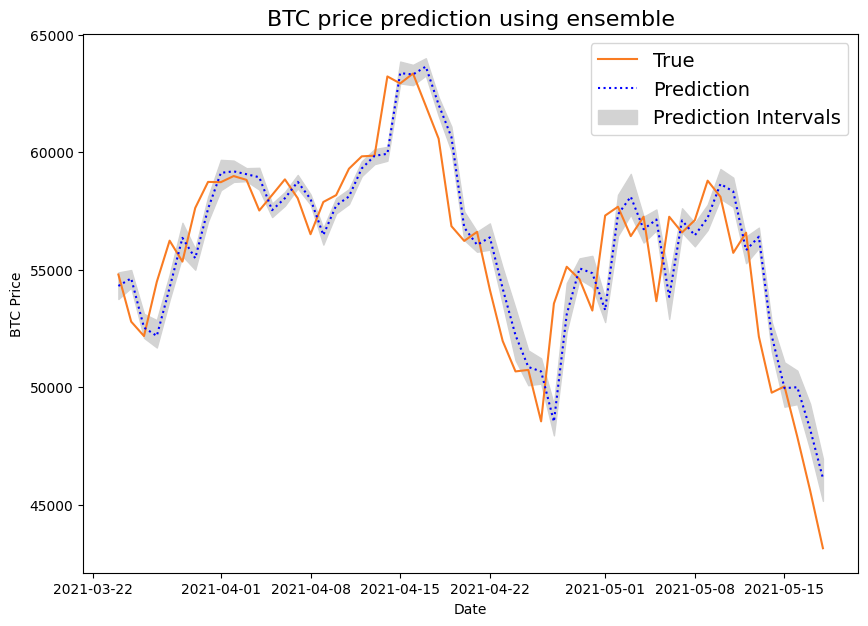

In [123]:
offset = 500

# Get the median value of our ensemble preds
ensemble_median = np.median(ensemble_preds, axis=0)

# Plotting the the median of ensemble preds along with its interval
plt.figure(figsize=(10, 7))
plt.plot(X_test.index[offset:], y_test[offset:], c='#F97B22', label='True')
plt.plot(X_test.index[offset:], ensemble_median[offset:], ':',c='blue',label='Prediction');

# Plotting 95% prediction intervals
plt.fill_between(X_test.index[offset:],
                 lower[offset:],
                 upper[offset:],
                 color='lightgrey',
                 label='Prediction Intervals');

plt.title('BTC price prediction using ensemble', fontsize=16)
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14);

It looks like the ensemble predictions are lagging slightly behind the actual data.

And the prediction intervals are fairly low throughout.

The combination of lagging predictions as well as low prediction intervals indicates that our ensemble model may be **overfitting** the data, meaning it's basically replicating what a `naïve model` would do and just predicting the previous timestep value for the next value.

This would explain why previous attempts to beat the naïve forecast have been futile.

We can test this hypothesis of overfitting by creating a model to make predictions into the future and seeing what they look like.

> 🔑 **Note:** Our prediction intervals assume that the data we're using come from a Gaussian/normal distribution (also called a bell curve), however, open systems rarely follow the Gaussian.


## Aside: two types of uncertainty (coconut and subway)

There are two types of uncertainty in machine learning you should be aware of:

* **Aleatoric uncertainty** - this type of uncertainty cannot be reduced, it is also referred to as "data" or "subway" uncertainty.
  * Let's say your train is scheduled to arrive at 10:08am but very rarely does it arrive at *exactly* 10:08am. You know it's usually a minute or two either side and perhaps up to 10-minutes late if traffic is bad. Even with all the data you could imagine, this level of uncertainty is still going to be present (much of it being noise).
  * When we measured prediction intervals, we were measuring a form of subway uncertainty for Bitcoin price predictions (a little either side of the point prediction).

* **Epistemic uncertainty** - this type of uncertainty can be reduced, it is also referred to as "model" or "coconut" uncertainty, it is very hard to calculate.
  * The analogy for coconut uncertainty involves whether or not you'd get hit on the head by a coconut when going to a beach.
    * If you were at a beach with coconuts trees, as you could imagine, this would be very hard to calculate. How often does a coconut fall of a tree? Where are you standing?
    * But you could reduce this uncertainty to zero by going to a beach without coconuts (collect more data about your situation).
  * Model uncertainty can be reduced by collecting more data samples/building a model to capture different parameters about the data you're modelling.

The lines between these are blurred (one type of uncertainty can change forms into the other) and they can be confusing at first but are important to keep in mind for any kind of time series prediction.

# Model 9 (Full data)

Training a model on the full historic data to make predicitons into the future.

In [124]:
bitcoin_prices_windowed.head()

,Price,Block Reward,Prices1,Prices2,Prices3,Prices4,Prices5,Prices6,Prices7
Date,,,,,,,,,
2013-10-01,123.65499,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-02,125.45500,25,123.65499,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-03,108.58483,25,125.45500,123.65499,NaN,NaN,NaN,NaN,NaN
2013-10-04,118.67466,25,108.58483,125.45500,123.65499,NaN,NaN,NaN,NaN
2013-10-05,121.33866,25,118.67466,108.58483,125.45500,123.65499,NaN,NaN,NaN


In [125]:
X_all = bitcoin_prices_windowed.dropna().drop(['Price', 'Block Reward'], axis=1).to_numpy() # Making predictions for univariate data
y_all = bitcoin_prices_windowed.dropna()['Price'].to_numpy()

In [126]:
dataset_all = create_dataset(X_all, y_all)
dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [127]:
# Create a simple model
model_9 = Sequential([
    layers.Dense(128, 'relu'),
    layers.Dense(128, 'relu'),
    layers.Dense(HORIZON)
], name='model_9_future_model')

model_9.compile(loss='mae',
                optimizer=Adam())

model_9.fit(dataset_all,
            epochs=100,
            verbose=0,
            validation_data=dataset_all,
            callbacks=[create_model_checkpoint(model_9.name)])

In [128]:
model_9.evaluate(dataset_all)

87/87 [==============================] - 0s 2ms/step - loss: 261.4090


261.4090270996094

In [129]:
# Load in saved best performing model_1 and evaluate on test data
model_9 = tf.keras.models.load_model("model_experiments/model_9_future_model")
model_9.evaluate(dataset_all)

87/87 [==============================] - 0s 2ms/step - loss: 199.1089


199.10890197753906

# Make predictions into future

###🔑 **Note**:

* You need to retrain your model every time you want to generate a new prediction.
* The uncertainty of the forecast is just as important as, or even more so, than the forecast itself.

Check out [3 facts about time series forecasting that surprise experienced machine learning practitioners](https://towardsdatascience.com/3-facts-about-time-series-forecasting-that-surprise-experienced-machine-learning-practitioners-69c18ee89387#:~:text=Model%20training%20is%20a%20one,to%20generate%20a%20new%20forecast.)

In [130]:
# How many timesteps to predict into the future?
N_PREDS = 14 # Since our Bitcoin data is daily, this is for 14 days

![flowchart representation prediction loop to make forecasts and then append forecasts to data and make more forecasts continuously until forecast horizon is exhausted](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-prediction-loop-for-forecasts.png)

*Example flow chart representing the loop we're about to create for making forecasts.*

 *Not pictured: retraining a forecasting model every time a forecast is made & new data is acquired. For example, if you're predicting the price of Bitcoin daily, you'd want to retrain your model every day, since each day you're going to have a new data point to work with.*

Alright, let's create a function which returns `INTO_FUTURE` forecasted values using a trained model.

To do so, we'll build the following steps:
1. Function which takes as input:
  * a list of values (the Bitcoin historical data)
  * a trained model (such as `model_9`)
  * a window into the future to predict (our `INTO_FUTURE` variable)
  * the window size a model was trained on (`WINDOW_SIZE`) - the model can only predict on the same kind of data it was trained on
2. Creates an empty list for future forecasts (this will be returned at the end of the function) and extracts the last `WINDOW_SIZE` values from the input values (predictions will start from the last `WINDOW_SIZE` values of the training data)
3. Loop `INTO_FUTURE` times making a prediction on `WINDOW_SIZE` datasets which update to remove the first the value and append the latest prediction
  * Eventually future predictions will be made using the model's own previous predictions as input

## Real-time training the model

In [131]:
y_all.shape

(2780,)

In [132]:
# Create a function that trains a model and returns its predicited output
def get_model_pred(input, label, index: int, window_size=WINDOW_SIZE):

  # Creating tensorflow dataset
  train_data = create_dataset(input, label)

  # Create the model
  model = Sequential([
      layers.Dense(128, 'relu'),
      layers.Dense(128, 'relu'),
      layers.Dense(1)
      ],name=f'model_{i}_dense')

  # Compile the model
  model.compile(loss='mae',
                optimizer=Adam())

  # Fit the model
  model.fit(train_data,
            epochs=100,
            verbose=0)

  # Get the prediction
  last_window = label[-WINDOW_SIZE:]
  model_pred = model.predict(tf.expand_dims(last_window, axis=0), verbose=0)
  return tf.squeeze(model_pred)

In [133]:
# Create a function that iteratively predict all the predictions
def realtime_preds(input, label, n_preds=N_PREDS):
  # Create a copy of the input
  train_data_copy = input.copy()
  # Prevent tensorflow from giving warnings
  n_preds_add_1 = tf.convert_to_tensor(n_preds + 1, dtype=tf.int64)

  # Get all the predictions
  for i in range(1, n_preds_add_1):
    # The inital prediction
    print(f"Training Model {i} ...")
    model_pred = get_model_pred(train_data_copy, label, i)
    print("Prediction:")
    print(f"{train_data_copy[-1]} ->  {model_pred}\n\n\n")

    # Adding the predicted input to the train dataset (X and y)
    new_window = train_data_copy[-1][1:]
    new_window = np.append(new_window, model_pred)
    train_data_copy = np.vstack((train_data_copy, new_window))
    label = np.append(label, model_pred)
  return label[-n_preds:]

In [134]:
%%time
model_predictions = realtime_preds(X_all, y_all)

Training Model 1 ...
Prediction:
[45604.61575361 47885.62525472 50032.69313676 49764.1320816
 52147.82118698 56573.5554719  55715.54665129] ->  55932.328125



Training Model 2 ...
Prediction:
[47885.62525472 50032.69313676 49764.1320816  52147.82118698
 56573.5554719  55715.54665129 55932.328125  ] ->  51241.9609375



Training Model 3 ...
Prediction:
[50032.69313676 49764.1320816  52147.82118698 56573.5554719
 55715.54665129 55932.328125   51241.9609375 ] ->  49279.71484375



Training Model 4 ...
Prediction:
[49764.1320816  52147.82118698 56573.5554719  55715.54665129
 55932.328125   51241.9609375  49279.71484375] ->  50468.21875



Training Model 5 ...
Prediction:
[52147.82118698 56573.5554719  55715.54665129 55932.328125
 51241.9609375  49279.71484375 50468.21875   ] ->  44059.0625



Training Model 6 ...
Prediction:
[56573.5554719  55715.54665129 55932.328125   51241.9609375
 49279.71484375 50468.21875    44059.0625    ] ->  46981.56640625



Training Model 7 ...
Prediction:
[557

## Plot future forecasts

To plot our model's future forecasts against the historical data of Bitcoin, we're going to need a series of future dates (future dates from the final date of where our dataset ends).

How about we create a function to return a date range from some specified start date to a specified number of days into the future (`N_PREDS`).

To do so, we'll use a combination of NumPy's [`datetime64` datatype](https://numpy.org/doc/stable/reference/arrays.datetime.html) (our Bitcoin dates are already in this datatype) as well as NumPy's `timedelta64` method which helps to create date ranges.

In [135]:
def get_future_days(start_date, number, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+number.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """

  start_date += np.timedelta64(offset, 'D')
  end_date = start_date + np.timedelta64(number, 'D')
  return np.arange(start_date, end_date, dtype="datetime64[D]")

In [136]:
last_timestep = bitcoin.index[-1]
last_timestep

Timestamp('2021-05-18 00:00:00')

In [137]:
next_timesteps = get_future_days(last_timestep, N_PREDS)
next_timesteps

array(['2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
       '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
       '2021-05-27', '2021-05-28', '2021-05-29', '2021-05-30',
       '2021-05-31', '2021-06-01'], dtype='datetime64[D]')

In [138]:
next_timesteps = np.insert(next_timesteps, 0 , last_timestep)
future_forecast = np.insert(model_predictions, 0 , btc_price[-1])
next_timesteps, future_forecast

(array(['2021-05-18', '2021-05-19', '2021-05-20', '2021-05-21',
        '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
        '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
        '2021-05-30', '2021-05-31', '2021-06-01'], dtype='datetime64[D]'),
 array([43144.47129086, 55932.328125  , 51241.9609375 , 49279.71484375,
        50468.21875   , 44059.0625    , 46981.56640625, 49494.34765625,
        50328.03125   , 50007.1328125 , 48667.46484375, 48257.72265625,
        41238.46875   , 46944.265625  , 48561.44140625]))

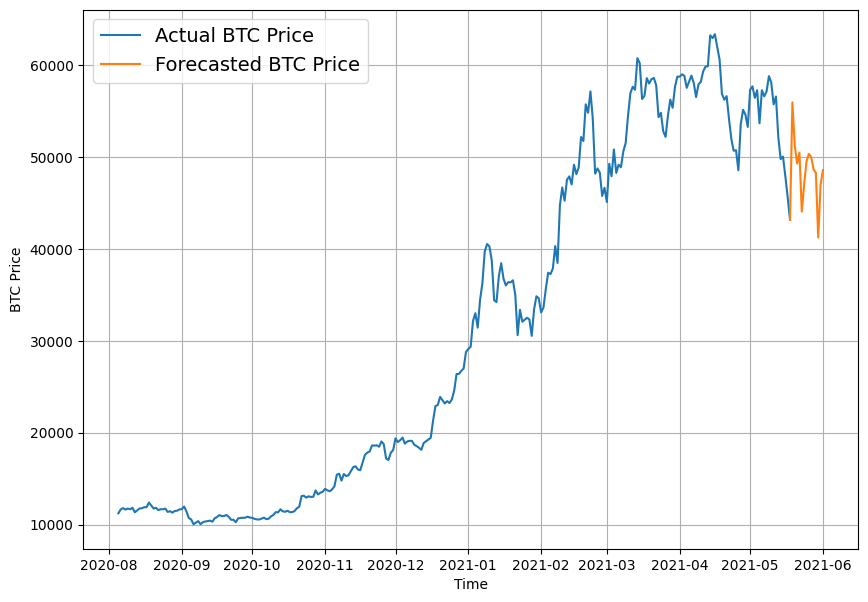

In [139]:
offset = 2500

plt.figure(figsize=(10, 7))
plot_time_series(bitcoin.index, btc_price, start=offset, format='-', label='Actual BTC Price')
plot_time_series(next_timesteps, future_forecast, format='-',label='Forecasted BTC Price')

# Model 10 (turkey problem)

When creating any kind of forecast, you must keep the **turkey problem** in mind.

The **turkey problem** is an analogy for when your observational data (your historical data) fails to capture a future event which is catostrophic and could lead you to ruin.

The story goes, a turkey lives a good life for 1000 days, being fed every day and taken care of by its owners until the evening before Thanksgiving.

Based on the turkey's observational data, it has no reason to believe things shouldn't keep going the way they are.

In other words, how could a turkey possibly predict that on day 1001, after 1000 consectutive good days, it was about to have a far from ideal day.

![the turkey problem illustrated, a turkey lives 1000 good days until the eve of thanksgiving](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/10-the-turkey-problem.png)
*Example of the turkey problem. A turkey might live 1000 good days and none of them would be a sign of what's to happen on day 1001. Similar with forecasting, your historical data may not have any indication of a change which is about to come. The graph image is from page 41 of [The Black Swan](https://en.wikipedia.org/wiki/The_Black_Swan:_The_Impact_of_the_Highly_Improbable) by Nassim Taleb (I added in the turkey graphics).*

How does this relate to predicting the price of Bitcoin (or the price of any stock or figure in an open market)?

You could have the historical data of Bitcoin for its entire existence and build a model which predicts it perfectly.

But then one day for some unknown and unpredictable reason, the price of Bitcoin plummets 100x in a single day.

Of course, this kind of scenario is unlikely.

But that doesn't take away from its significance.

Let's get specific and see how the turkey problem effects us modelling the historical and future price of Bitcoin.

To do so, we're going to manufacture a highly unlikely data point into the historical price of Bitcoin, the price falling 100x in one day.

> 🔑 **Note:** A very unlikely and unpredictable event such as the price of Bitcoin falling 100x in a single day is also referred to a [**Black Swan** event](https://en.wikipedia.org/wiki/Black_swan_theory). A Black Swan event is an unknown unknown, you have no way of predicting whether or not it will happen but these kind of events often have a large impact.  

In [140]:
btc_price_turkey = btc_price.copy()
btc_price_turkey[-1] = btc_price_turkey[-1]/100

In [141]:
btc_price_turkey[-10:]

[58788.2096789273,
 58102.1914262342,
 55715.5466512869,
 56573.5554719043,
 52147.8211869823,
 49764.1320815975,
 50032.6931367648,
 47885.6252547166,
 45604.6157536131,
 431.44471290860304]

Notice the last value is 100x lower than what it actually was (remember, this is not a real data point, its only to illustrate the effects of the turkey problem).

Now we've got Bitcoin prices including a turkey problem data point, let's get the timesteps.

In [142]:
# Get the timesteps for the turkey problem
btc_timesteps_turkey = np.array(bitcoin.index)
btc_timesteps_turkey[-10:]

array(['2021-05-09T00:00:00.000000000', '2021-05-10T00:00:00.000000000',
       '2021-05-11T00:00:00.000000000', '2021-05-12T00:00:00.000000000',
       '2021-05-13T00:00:00.000000000', '2021-05-14T00:00:00.000000000',
       '2021-05-15T00:00:00.000000000', '2021-05-16T00:00:00.000000000',
       '2021-05-17T00:00:00.000000000', '2021-05-18T00:00:00.000000000'],
      dtype='datetime64[ns]')

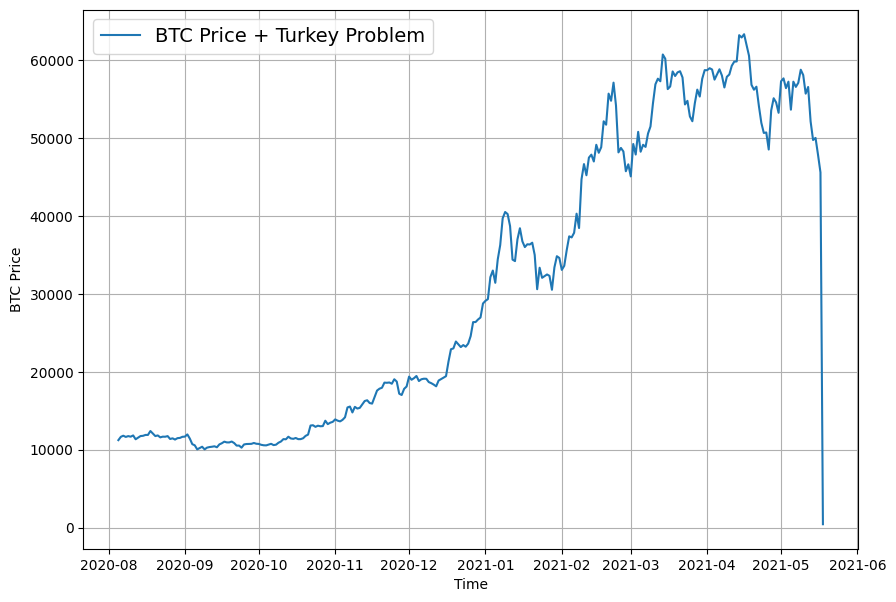

In [143]:
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=btc_timesteps_turkey,
                 values=btc_price_turkey,
                 format="-",
                 label="BTC Price + Turkey Problem",
                 start=2500)

In [144]:
# Create train and test sets for turkey problem data
full_windows, full_labels = make_windows(np.array(btc_price_turkey), window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

X_train, X_test, y_train, y_test = make_train_test_splits(full_windows, full_labels)
len(X_train), len(X_test), len(y_train), len(y_test)

(2224, 556, 2224, 556)

## Building a turkey model (model to predict on turkey data)

With our updated data, we only changed 1 value.

Let's see how it effects a model.

To keep things comparable to previous models, we'll create a `turkey_model` which is a clone of `model_1` (same architecture, but different data).

That way, when we evaluate the `turkey_model` we can compare its results to `model_1_results` and see how much a single data point can influence a model's performance.


In [145]:
turkey_model = tf.keras.models.clone_model(model_1)
turkey_model._name = 'turkey_model' # Make sure you have an underscore when you change the model name
turkey_model.compile(loss='mae',
                     optimizer=Adam())
turkey_model.fit(X_train,
                 X_train,
                 epochs=100,
                 verbose=0,
                 validation_data=(X_test, y_test),
                 callbacks=[create_model_checkpoint(turkey_model.name)])

In [146]:
# Evaluationg the model
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1192.7615


1192.761474609375

In [147]:
# Load best model and evaluate on test data
turkey_model = tf.keras.models.load_model("model_experiments/turkey_model")
turkey_model.evaluate(X_test, y_test)

18/18 [==============================] - 0s 2ms/step - loss: 1163.6818


1163.6817626953125

In [148]:
# Make predictions with Turkey model
turkey_preds = make_preds(turkey_model, X_test)
turkey_preds[:10]

18/18 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([9366.602, 9282.441, 9227.475, 9121.95 , 9021.941, 8983.953,
       8901.223, 8847.065, 8804.812, 8722.224], dtype=float32)>

In [149]:
# Evaluate turkey preds
turkey_results = evaluate_preds(y_true=y_test,
                                y_pred=turkey_preds)
turkey_results

{'mae': 17091.66,
 'mse': 615056000.0,
 'rmse': 23724.553,
 'mape': 120.83006,
 'mase': 26.4494}

And with just one value change, our error metrics go through the roof.

To make sure, let's remind ourselves of how `model_1` went on unmodified Bitcoin data (no turkey problem).

In [150]:
model_1_results

{'mae': 564.2149,
 'mse': 1158016.8,
 'rmse': 1076.1118,
 'mape': 2.513272,
 'mase': 0.99116933}

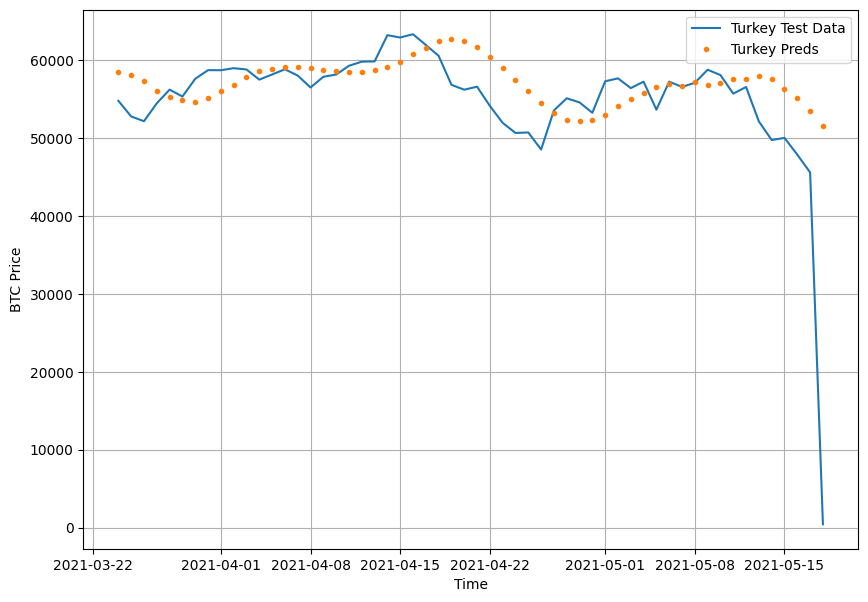

In [151]:
plt.figure(figsize=(10, 7))

offset=500

plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=btc_price_turkey[-len(y_test):],
                 format="-",
                 label="Turkey Test Data", start=offset)
plot_time_series(timesteps=btc_timesteps_turkey[-len(X_test):],
                 values=turkey_preds,
                 label="Turkey Preds",
                 start=offset)
plt.legend(loc='upper right');

A model cannot predict anything in the future outside of the distribution it was trained on.

In turn, highly unlikely price movements (based on historical movements), upward or downward will likely never be part of a forecast.

However, as we've seen, despite their unlikeliness, these events can have huuuuuuuuge impacts to the performance of our models.


## Compare Models

We've trained a bunch of models.

And if anything, we've seen just how poorly machine learning and deep learning models are at forecasting the price of Bitcoin (or any kind of open market value).

To highlight this, let's compare the results of all of the modelling experiments we've performed so far.

In [152]:
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"naive_model": naive_results,
                              "model_1_dense_w7_h1": model_1_results,
                              "model_2_dense_w30_h1": model_2_results,
                              "model_3_dense_w30_h7": model_3_results,
                              "model_4_CONV1D": model_4_results,
                              "model_5_LSTM": model_5_results,
                              "model_6_multivariate": model_6_results,
                              "model_8_NBEATs": model_7_results,
                              "model_9_ensemble": model_8_results,
                              "model_10_turkey": turkey_results}).T
model_results.head(10)

,mae,mse,rmse,mape,mase
naive_model,567.980225,1.147547e+06,1071.236206,2.516525,0.999570
model_1_dense_w7_h1,564.214905,1.158017e+06,1076.111816,2.513272,0.991169
model_2_dense_w30_h1,617.323547,1.296715e+06,1138.733887,2.832459,1.079088
model_3_dense_w30_h7,1220.040283,5.289966e+06,1405.864624,5.448715,2.170994
model_4_CONV1D,572.728882,1.184853e+06,1088.509644,2.567692,1.006126
model_5_LSTM,573.496094,1.191209e+06,1091.425293,2.573565,1.007474
model_6_multivariate,567.796143,1.170941e+06,1082.100098,2.553903,0.997461
model_8_NBEATs,566.804321,1.092415e+06,1045.186401,2.587101,0.995718
model_9_ensemble,567.953003,1.147456e+06,1071.193481,2.561188,0.997736
model_10_turkey,17091.660156,6.150560e+08,23724.552734,120.830063,26.449400


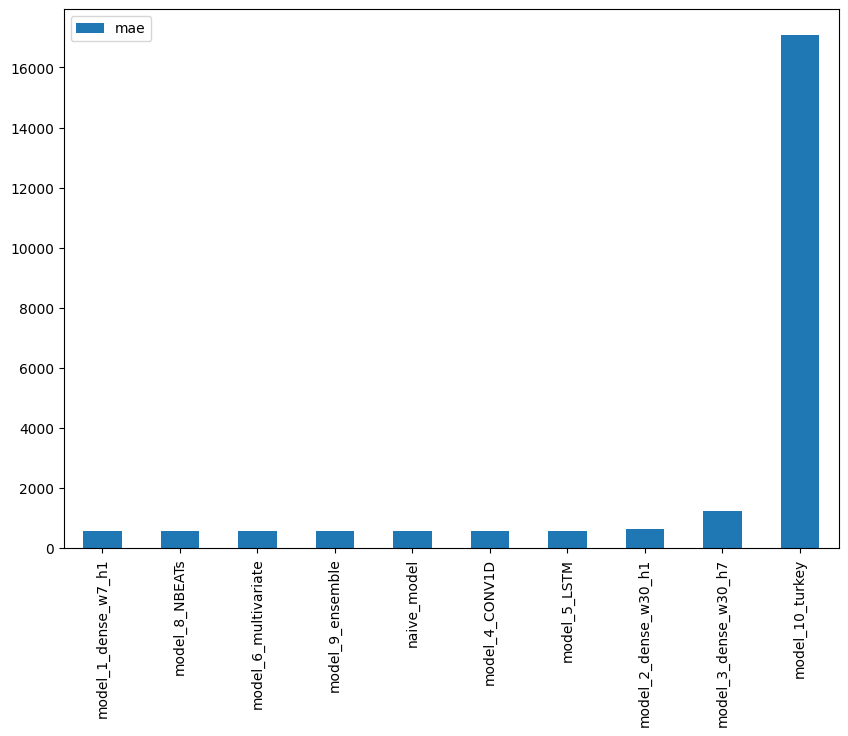

In [153]:
# Sort model results by MAE and plot them
model_results[["mae"]].sort_values(by="mae").plot(figsize=(10, 7), kind="bar");

The majority of our deep learning models perform on par or only slightly better than the naive model. And for the turkey model, changing a single data point destroys its performance.

> 🔑 **Note:** Just because one type of model performs better here doesn't mean it'll perform the best elsewhere (and vice versa, just because one model performs poorly here, doesn't mean it'll perform poorly elsewhere).